In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 kB 32.1 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from sklearn.preprocessing import OneHotEncoder
import os
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sn
import numpy as np
import visualkeras

In [ ]:
drive.mount('/content/drive')

!pwd
os.chdir("drive/MyDrive/Sayısal Video İşleme/hw2")
!pwd

Mounted at /content/drive
/content
/content/drive/MyDrive/Sayısal Video İşleme/hw2


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
onehot_encoder = OneHotEncoder(sparse_output=False)
y_train = onehot_encoder.fit_transform(y_train)
y_test = onehot_encoder.fit_transform(y_test)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (X_validation.shape, y_validation.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 10)
Validation: X=(10000, 32, 32, 3), y=(10000, 10)
Test: X=(10000, 32, 32, 3), y=(10000, 10)


In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
def build_model(num_layers, num_filters, kernel_size, dropout):
  model = Sequential()
  model.add(Conv2D(filters=num_filters, kernel_size=(kernel_size, kernel_size), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(filters=num_filters, kernel_size=(kernel_size, kernel_size), activation='relu', padding='same'))
  model.add(Conv2D(filters=num_filters, kernel_size=(kernel_size, kernel_size), activation='relu', padding='same'))
  if(num_layers == 5):
    model.add(Conv2D(filters=num_filters, kernel_size=(kernel_size, kernel_size), activation='relu', padding='same'))
    model.add(Conv2D(filters=num_filters, kernel_size=(kernel_size, kernel_size), activation='relu', padding='same'))
  if(dropout):
     model.add(Dropout(0.3))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  if(dropout):
     model.add(Dropout(0.3))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
def print_result(y_real, y_pred, model_name):
    plt.figure(figsize=(12, 9))
    y_pred = np.argmax(y_pred, axis=1)
    y_real = np.argmax(y_real, axis=1)
    cm = confusion_matrix(y_real, y_pred)
    ax = plt.subplot()
    sn.heatmap(cm, annot=True, fmt="g", ax=ax)

    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title("Confusion Matrix")
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()

    acc = accuracy_score(y_real, y_pred)
    f1 = f1_score(y_real, y_pred, average="macro")
    precision = precision_score(y_real, y_pred, average="macro")
    recall = recall_score(y_real, y_pred, average="macro")

    print(model_name)
    print("Accuracy is ", acc)
    print("F1 Score is ", f1)
    print("Precision is ", precision)
    print("Recall is ", recall)

    return acc, f1, precision, recall

In [ ]:
num_layers = [3, 5]
num_filters = [32, 64]
kernel_size = [3, 5]
dropout = [True, False]

In [ ]:
histories = {}
models = {}
results = {}

Epoch 1/10
500/500 [==============================] - 20s 10ms/step - loss: 1.7516 - accuracy: 0.3669 - val_loss: 1.4331 - val_accuracy: 0.4801
Epoch 2/10
500/500 [==============================] - 5s 10ms/step - loss: 1.4201 - accuracy: 0.4894 - val_loss: 1.2648 - val_accuracy: 0.5445
Epoch 3/10
500/500 [==============================] - 5s 9ms/step - loss: 1.2464 - accuracy: 0.5548 - val_loss: 1.1416 - val_accuracy: 0.5996
Epoch 4/10
500/500 [==============================] - 4s 9ms/step - loss: 1.1213 - accuracy: 0.5987 - val_loss: 1.0962 - val_accuracy: 0.6129
Epoch 5/10
500/500 [==============================] - 5s 10ms/step - loss: 1.0159 - accuracy: 0.6374 - val_loss: 1.0672 - val_accuracy: 0.6190
Epoch 6/10
500/500 [==============================] - 5s 9ms/step - loss: 0.9027 - accuracy: 0.6760 - val_loss: 1.0531 - val_accuracy: 0.6313
Epoch 7/10
500/500 [==============================] - 5s 9ms/step - loss: 0.8064 - accuracy: 0.7093 - val_loss: 1.0972 - val_accuracy: 0.6246
Ep

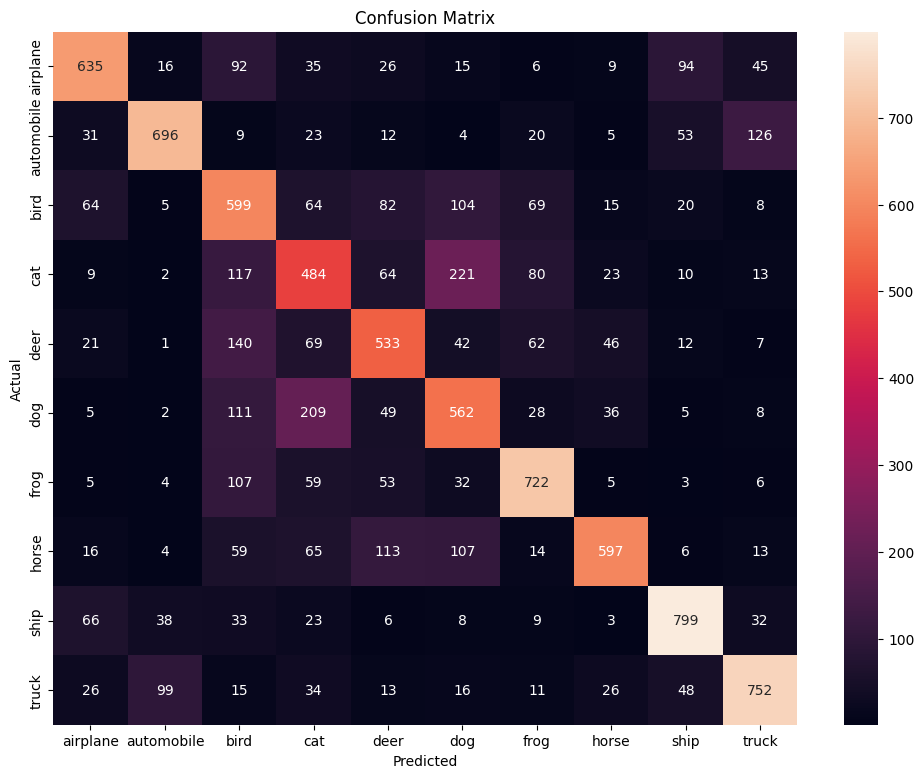

3_layer_32_filter_3_kernel_True_dropout
Accuracy is  0.6379
F1 Score is  0.6417925008010823
Precision is  0.65070636759572
Recall is  0.6377416189213132
Epoch 1/10
500/500 [==============================] - 9s 9ms/step - loss: 1.5697 - accuracy: 0.4377 - val_loss: 1.2777 - val_accuracy: 0.5426
Epoch 2/10
500/500 [==============================] - 4s 8ms/step - loss: 1.1218 - accuracy: 0.6033 - val_loss: 1.1180 - val_accuracy: 0.6081
Epoch 3/10
500/500 [==============================] - 4s 9ms/step - loss: 0.8585 - accuracy: 0.6994 - val_loss: 1.0502 - val_accuracy: 0.6365
Epoch 4/10
500/500 [==============================] - 6s 13ms/step - loss: 0.6360 - accuracy: 0.7768 - val_loss: 1.1418 - val_accuracy: 0.6286
Epoch 5/10
500/500 [==============================] - 6s 13ms/step - loss: 0.4165 - accuracy: 0.8555 - val_loss: 1.3485 - val_accuracy: 0.6212
Epoch 6/10
500/500 [==============================] - 6s 11ms/step - loss: 0.2380 - accuracy: 0.9189 - val_loss: 1.6583 - val_accuracy:

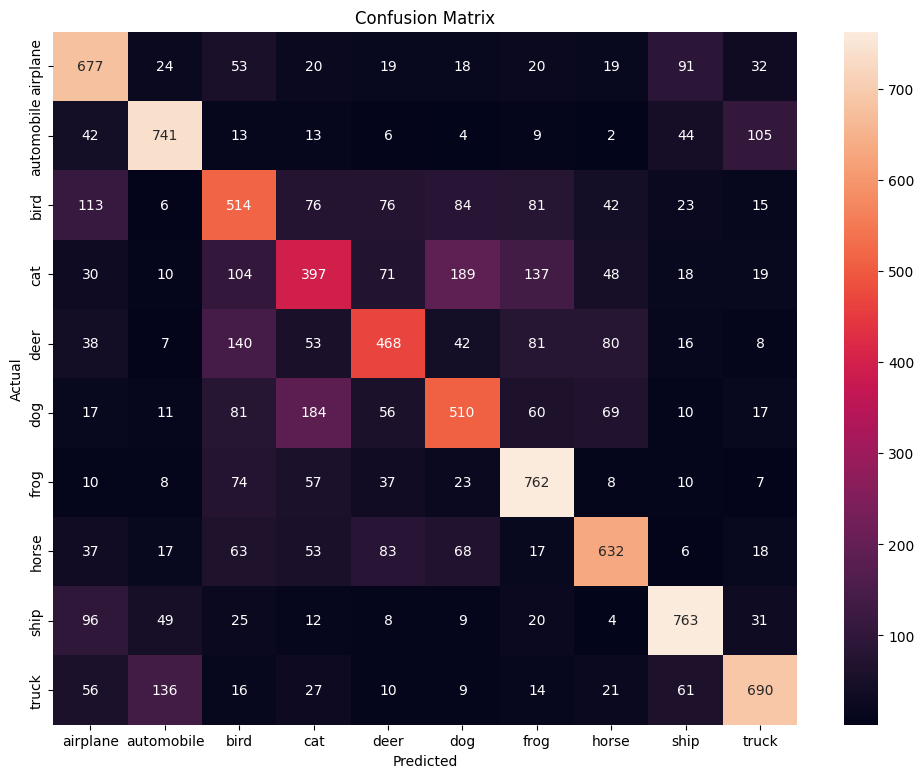

3_layer_32_filter_3_kernel_False_dropout
Accuracy is  0.6154
F1 Score is  0.6131730964669974
Precision is  0.6137764303617244
Recall is  0.6158437697309358
Epoch 1/10
500/500 [==============================] - 9s 13ms/step - loss: 1.7220 - accuracy: 0.3761 - val_loss: 1.4116 - val_accuracy: 0.4967
Epoch 2/10
500/500 [==============================] - 6s 13ms/step - loss: 1.3729 - accuracy: 0.5037 - val_loss: 1.2639 - val_accuracy: 0.5454
Epoch 3/10
500/500 [==============================] - 6s 13ms/step - loss: 1.1931 - accuracy: 0.5723 - val_loss: 1.1525 - val_accuracy: 0.5890
Epoch 4/10
500/500 [==============================] - 7s 14ms/step - loss: 1.0524 - accuracy: 0.6211 - val_loss: 1.1149 - val_accuracy: 0.6069
Epoch 5/10
500/500 [==============================] - 7s 13ms/step - loss: 0.9213 - accuracy: 0.6694 - val_loss: 1.1691 - val_accuracy: 0.5944
Epoch 6/10
500/500 [==============================] - 7s 13ms/step - loss: 0.8081 - accuracy: 0.7068 - val_loss: 1.1465 - val_acc

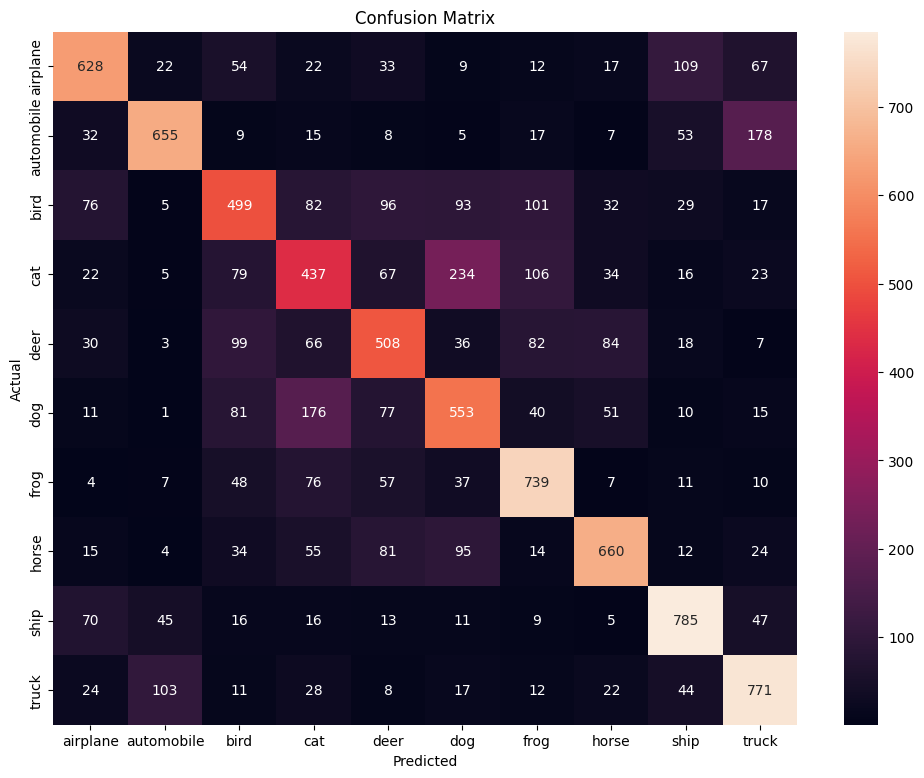

3_layer_32_filter_5_kernel_True_dropout
Accuracy is  0.6235
F1 Score is  0.6227154809075971
Precision is  0.6246473247576192
Recall is  0.6234601321194547
Epoch 1/10
500/500 [==============================] - 8s 13ms/step - loss: 1.4909 - accuracy: 0.4624 - val_loss: 1.3326 - val_accuracy: 0.5219
Epoch 2/10
500/500 [==============================] - 6s 11ms/step - loss: 1.1178 - accuracy: 0.6066 - val_loss: 1.1954 - val_accuracy: 0.5764
Epoch 3/10
500/500 [==============================] - 6s 12ms/step - loss: 0.8854 - accuracy: 0.6898 - val_loss: 1.0162 - val_accuracy: 0.6475
Epoch 4/10
500/500 [==============================] - 6s 12ms/step - loss: 0.6486 - accuracy: 0.7728 - val_loss: 1.1376 - val_accuracy: 0.6442
Epoch 5/10
500/500 [==============================] - 6s 11ms/step - loss: 0.4221 - accuracy: 0.8519 - val_loss: 1.3316 - val_accuracy: 0.6431
Epoch 6/10
500/500 [==============================] - 6s 13ms/step - loss: 0.2424 - accuracy: 0.9155 - val_loss: 1.6519 - val_accu

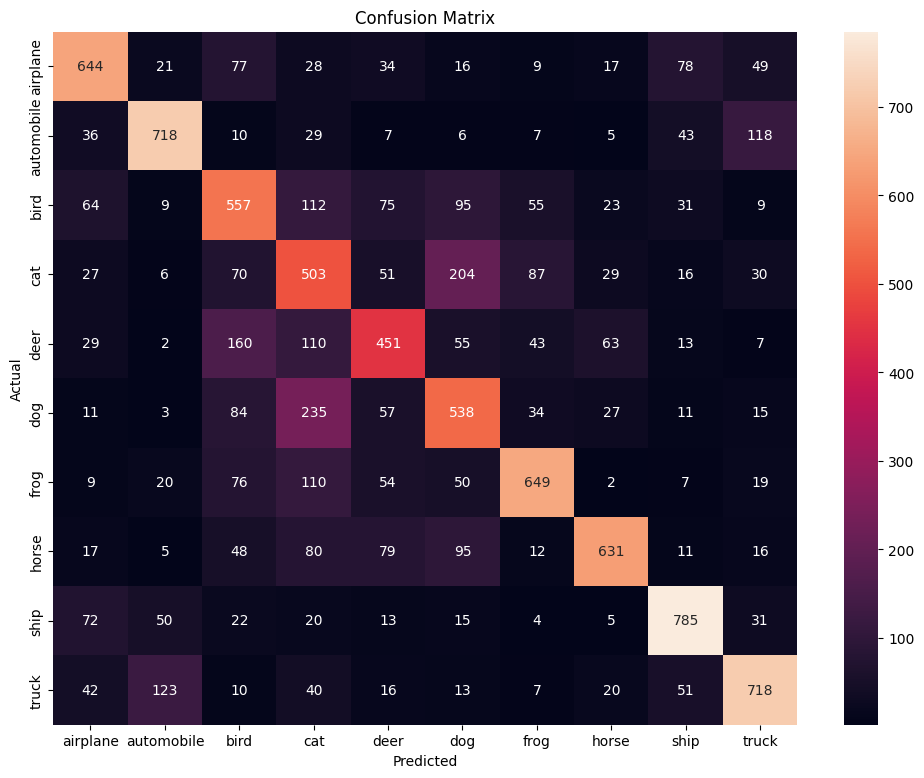

3_layer_32_filter_5_kernel_False_dropout
Accuracy is  0.6194
F1 Score is  0.6229410566961209
Precision is  0.6301363125578716
Recall is  0.6189853889205528
Epoch 1/10
500/500 [==============================] - 12s 19ms/step - loss: 1.6791 - accuracy: 0.3891 - val_loss: 1.3539 - val_accuracy: 0.5121
Epoch 2/10
500/500 [==============================] - 8s 17ms/step - loss: 1.3122 - accuracy: 0.5273 - val_loss: 1.1600 - val_accuracy: 0.5865
Epoch 3/10
500/500 [==============================] - 9s 18ms/step - loss: 1.1066 - accuracy: 0.6068 - val_loss: 1.1243 - val_accuracy: 0.6089
Epoch 4/10
500/500 [==============================] - 9s 18ms/step - loss: 0.9464 - accuracy: 0.6624 - val_loss: 1.0740 - val_accuracy: 0.6266
Epoch 5/10
500/500 [==============================] - 9s 18ms/step - loss: 0.7968 - accuracy: 0.7137 - val_loss: 1.0667 - val_accuracy: 0.6405
Epoch 6/10
500/500 [==============================] - 9s 17ms/step - loss: 0.6550 - accuracy: 0.7648 - val_loss: 1.0828 - val_ac

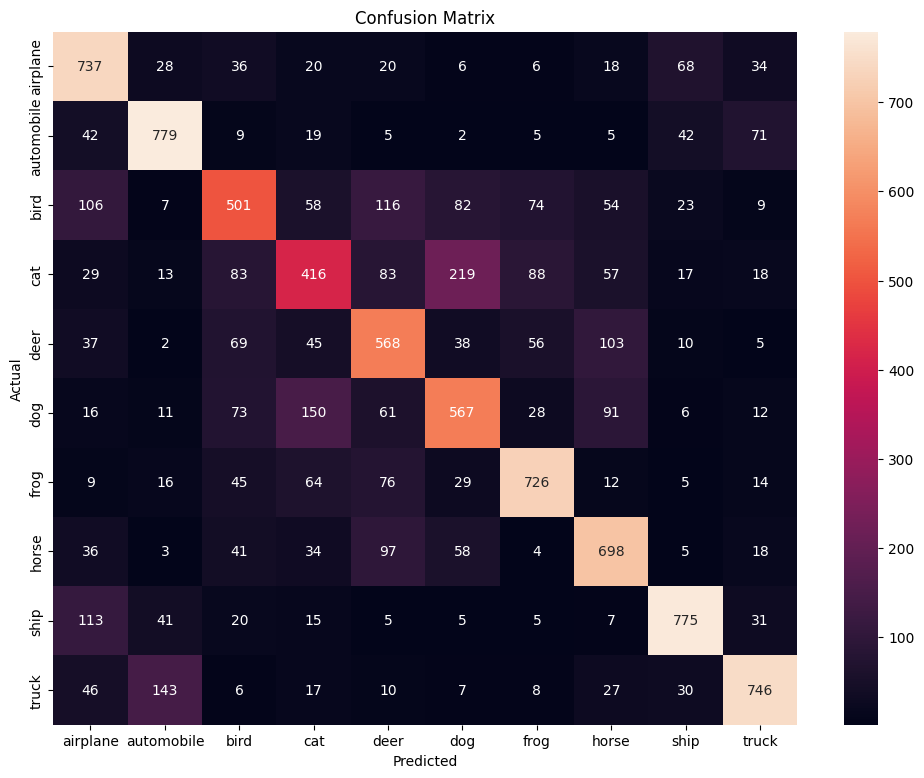

3_layer_64_filter_3_kernel_True_dropout
Accuracy is  0.6513
F1 Score is  0.6489212457465012
Precision is  0.6491252585267974
Recall is  0.6524107381821058
Epoch 1/10
500/500 [==============================] - 10s 15ms/step - loss: 1.5628 - accuracy: 0.4371 - val_loss: 1.3681 - val_accuracy: 0.5025
Epoch 2/10
500/500 [==============================] - 7s 15ms/step - loss: 1.1160 - accuracy: 0.6054 - val_loss: 1.1044 - val_accuracy: 0.6119
Epoch 3/10
500/500 [==============================] - 8s 15ms/step - loss: 0.8168 - accuracy: 0.7110 - val_loss: 1.0478 - val_accuracy: 0.6389
Epoch 4/10
500/500 [==============================] - 8s 15ms/step - loss: 0.5427 - accuracy: 0.8125 - val_loss: 1.1504 - val_accuracy: 0.6381
Epoch 5/10
500/500 [==============================] - 8s 15ms/step - loss: 0.2861 - accuracy: 0.9030 - val_loss: 1.3860 - val_accuracy: 0.6275
Epoch 6/10
500/500 [==============================] - 8s 15ms/step - loss: 0.1352 - accuracy: 0.9563 - val_loss: 1.8802 - val_acc

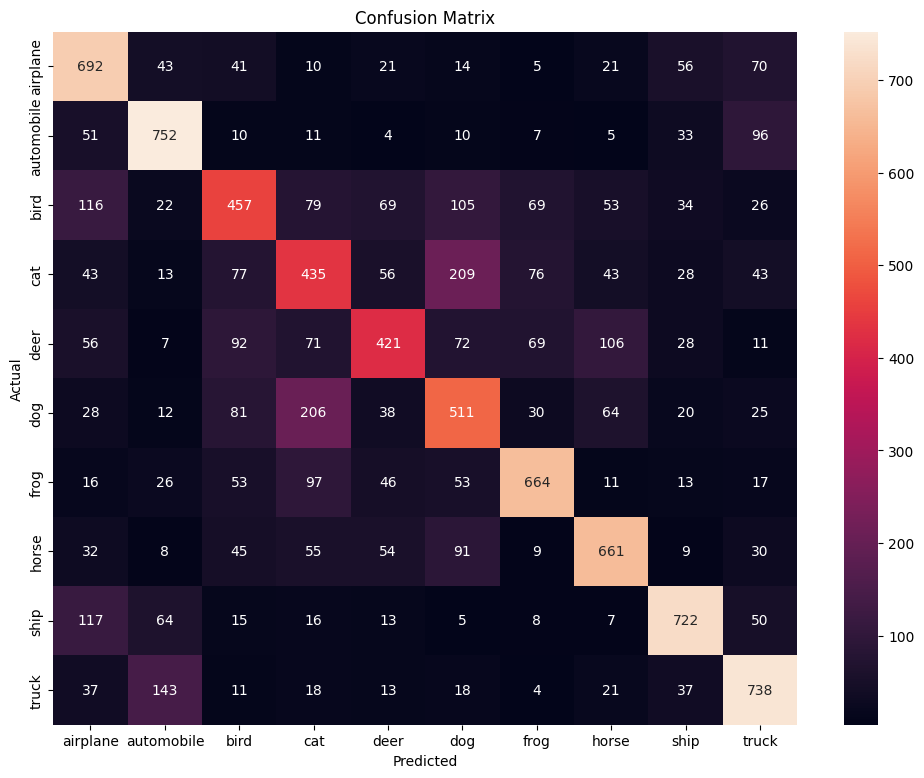

3_layer_64_filter_3_kernel_False_dropout
Accuracy is  0.6053
F1 Score is  0.6028779240087205
Precision is  0.6044837490239334
Recall is  0.6054126493949796
Epoch 1/10
500/500 [==============================] - 16s 24ms/step - loss: 1.8521 - accuracy: 0.3223 - val_loss: 1.4745 - val_accuracy: 0.4652
Epoch 2/10
500/500 [==============================] - 11s 22ms/step - loss: 1.4518 - accuracy: 0.4837 - val_loss: 1.2873 - val_accuracy: 0.5370
Epoch 3/10
500/500 [==============================] - 12s 24ms/step - loss: 1.2654 - accuracy: 0.5487 - val_loss: 1.2184 - val_accuracy: 0.5614
Epoch 4/10
500/500 [==============================] - 11s 23ms/step - loss: 1.1180 - accuracy: 0.6013 - val_loss: 1.1426 - val_accuracy: 0.5932
Epoch 5/10
500/500 [==============================] - 11s 22ms/step - loss: 0.9866 - accuracy: 0.6479 - val_loss: 1.1342 - val_accuracy: 0.6029
Epoch 6/10
500/500 [==============================] - 12s 24ms/step - loss: 0.8594 - accuracy: 0.6903 - val_loss: 1.1279 - v

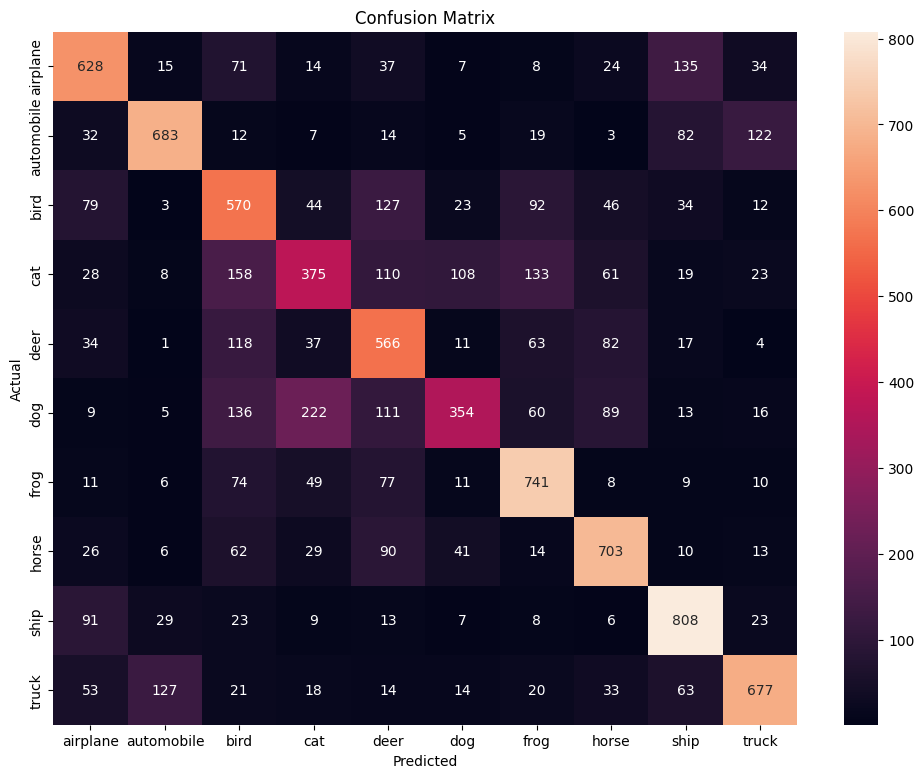

3_layer_64_filter_5_kernel_True_dropout
Accuracy is  0.6105
F1 Score is  0.6061800172843939
Precision is  0.6139176428239371
Recall is  0.6115132367920681
Epoch 1/10
500/500 [==============================] - 12s 21ms/step - loss: 1.6485 - accuracy: 0.4083 - val_loss: 1.3374 - val_accuracy: 0.5242
Epoch 2/10
500/500 [==============================] - 10s 21ms/step - loss: 1.2412 - accuracy: 0.5591 - val_loss: 1.2383 - val_accuracy: 0.5606
Epoch 3/10
500/500 [==============================] - 10s 21ms/step - loss: 1.0213 - accuracy: 0.6385 - val_loss: 1.1696 - val_accuracy: 0.5840
Epoch 4/10
500/500 [==============================] - 10s 20ms/step - loss: 0.7814 - accuracy: 0.7261 - val_loss: 1.2173 - val_accuracy: 0.5966
Epoch 5/10
500/500 [==============================] - 11s 22ms/step - loss: 0.4934 - accuracy: 0.8280 - val_loss: 1.3848 - val_accuracy: 0.5921
Epoch 6/10
500/500 [==============================] - 10s 20ms/step - loss: 0.2631 - accuracy: 0.9101 - val_loss: 1.8885 - va

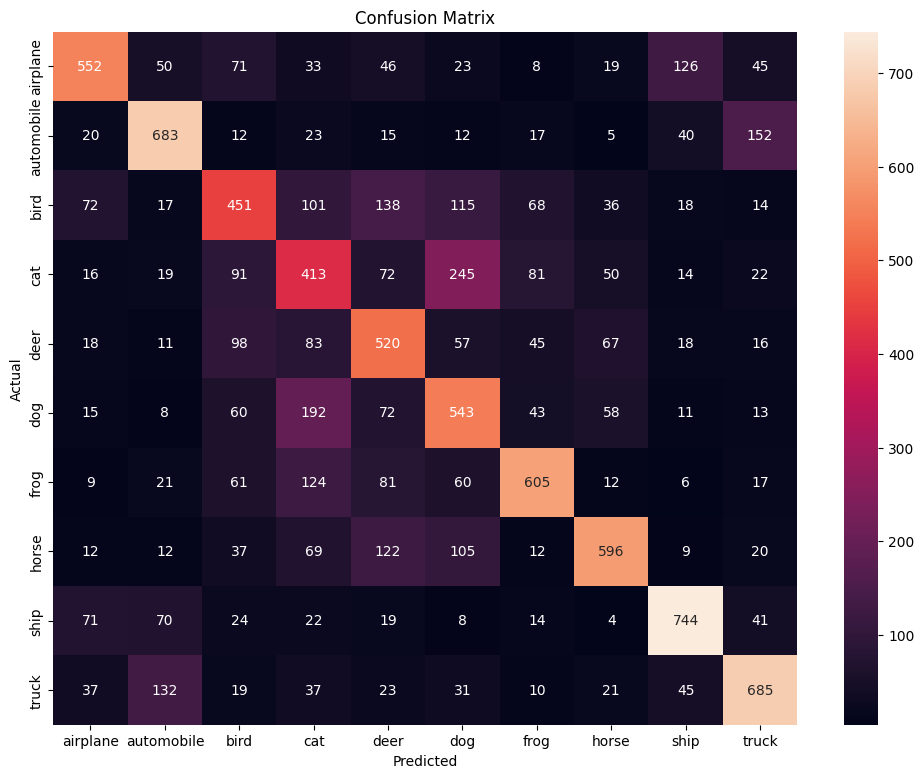

3_layer_64_filter_5_kernel_False_dropout
Accuracy is  0.5792
F1 Score is  0.5816018424027357
Precision is  0.5872492097874766
Recall is  0.5796108730783094
Epoch 1/10
500/500 [==============================] - 10s 15ms/step - loss: 1.6975 - accuracy: 0.3716 - val_loss: 1.3536 - val_accuracy: 0.5164
Epoch 2/10
500/500 [==============================] - 7s 14ms/step - loss: 1.3260 - accuracy: 0.5247 - val_loss: 1.1972 - val_accuracy: 0.5624
Epoch 3/10
500/500 [==============================] - 7s 14ms/step - loss: 1.1417 - accuracy: 0.5936 - val_loss: 1.0664 - val_accuracy: 0.6242
Epoch 4/10
500/500 [==============================] - 7s 14ms/step - loss: 1.0146 - accuracy: 0.6400 - val_loss: 1.0499 - val_accuracy: 0.6324
Epoch 5/10
500/500 [==============================] - 7s 14ms/step - loss: 0.8849 - accuracy: 0.6828 - val_loss: 1.0238 - val_accuracy: 0.6457
Epoch 6/10
500/500 [==============================] - 7s 14ms/step - loss: 0.7740 - accuracy: 0.7220 - val_loss: 1.0112 - val_ac

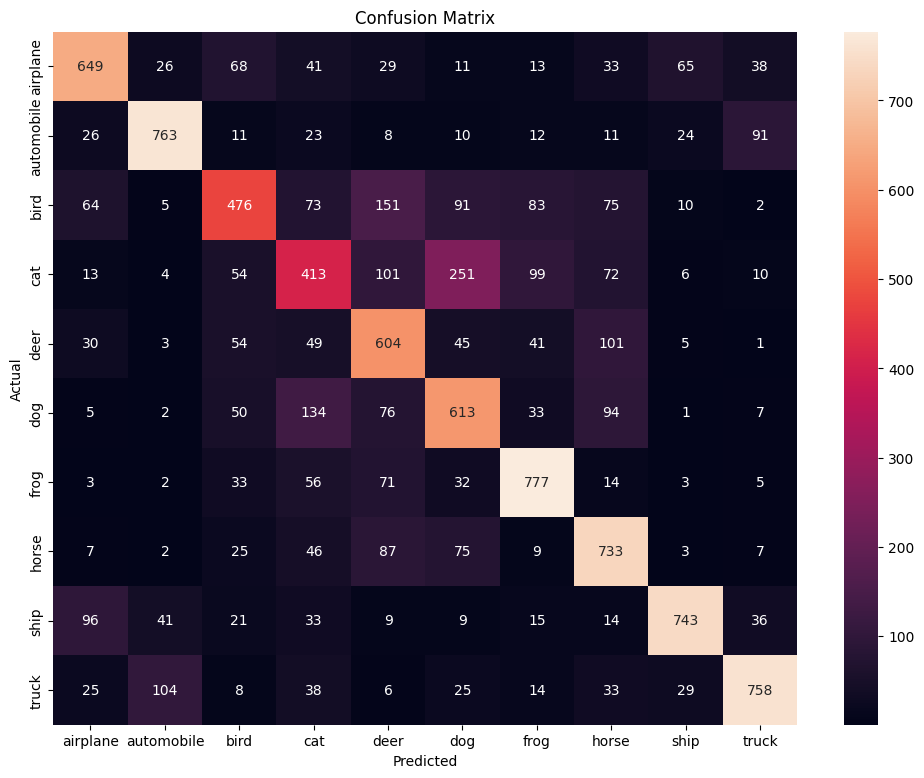

5_layer_32_filter_3_kernel_True_dropout
Accuracy is  0.6529
F1 Score is  0.6527127961749006
Precision is  0.6575343406946424
Recall is  0.6540512707374979
Epoch 1/10
500/500 [==============================] - 9s 14ms/step - loss: 1.5348 - accuracy: 0.4492 - val_loss: 1.3388 - val_accuracy: 0.5354
Epoch 2/10
500/500 [==============================] - 6s 12ms/step - loss: 1.0874 - accuracy: 0.6154 - val_loss: 1.1556 - val_accuracy: 0.5960
Epoch 3/10
500/500 [==============================] - 6s 13ms/step - loss: 0.8194 - accuracy: 0.7104 - val_loss: 1.0382 - val_accuracy: 0.6407
Epoch 4/10
500/500 [==============================] - 6s 12ms/step - loss: 0.5455 - accuracy: 0.8111 - val_loss: 1.1409 - val_accuracy: 0.6291
Epoch 5/10
500/500 [==============================] - 6s 12ms/step - loss: 0.2866 - accuracy: 0.9023 - val_loss: 1.5193 - val_accuracy: 0.6191
Epoch 6/10
500/500 [==============================] - 6s 13ms/step - loss: 0.1389 - accuracy: 0.9528 - val_loss: 2.1706 - val_accu

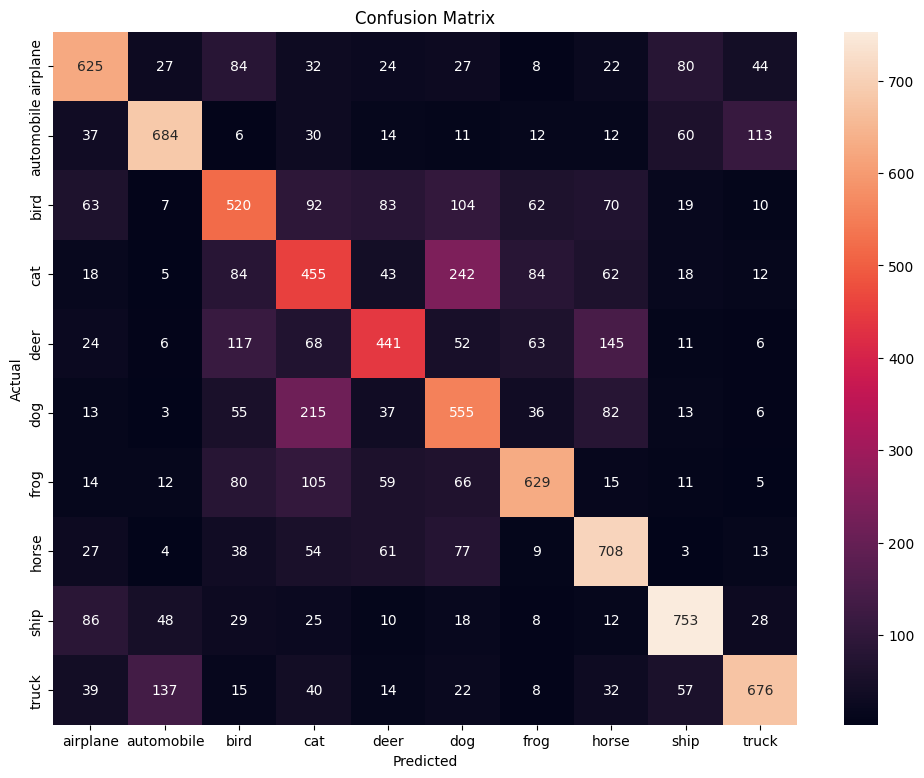

5_layer_32_filter_3_kernel_False_dropout
Accuracy is  0.6046
F1 Score is  0.606189062712027
Precision is  0.6110984427475004
Recall is  0.604431960052285
Epoch 1/10
500/500 [==============================] - 14s 21ms/step - loss: 1.8013 - accuracy: 0.3377 - val_loss: 1.5139 - val_accuracy: 0.4549
Epoch 2/10
500/500 [==============================] - 10s 21ms/step - loss: 1.4690 - accuracy: 0.4685 - val_loss: 1.3610 - val_accuracy: 0.5110
Epoch 3/10
500/500 [==============================] - 10s 21ms/step - loss: 1.3042 - accuracy: 0.5300 - val_loss: 1.2546 - val_accuracy: 0.5534
Epoch 4/10
500/500 [==============================] - 11s 22ms/step - loss: 1.1661 - accuracy: 0.5821 - val_loss: 1.2197 - val_accuracy: 0.5649
Epoch 5/10
500/500 [==============================] - 11s 21ms/step - loss: 1.0358 - accuracy: 0.6296 - val_loss: 1.1791 - val_accuracy: 0.5845
Epoch 6/10
500/500 [==============================] - 11s 22ms/step - loss: 0.9114 - accuracy: 0.6715 - val_loss: 1.2065 - val

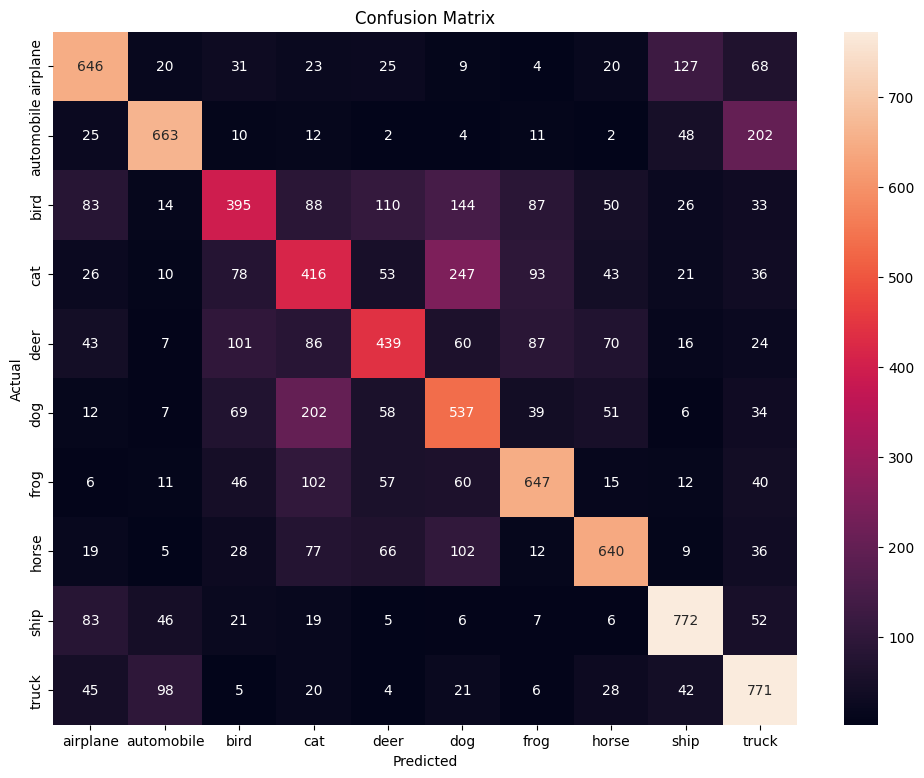

5_layer_32_filter_5_kernel_True_dropout
Accuracy is  0.5926
F1 Score is  0.5912126082915844
Precision is  0.5949430284661312
Recall is  0.5924782250796005
Epoch 1/10
500/500 [==============================] - 13s 21ms/step - loss: 1.6601 - accuracy: 0.3954 - val_loss: 1.3703 - val_accuracy: 0.5004
Epoch 2/10
500/500 [==============================] - 9s 18ms/step - loss: 1.2682 - accuracy: 0.5472 - val_loss: 1.2051 - val_accuracy: 0.5683
Epoch 3/10
500/500 [==============================] - 10s 20ms/step - loss: 1.0591 - accuracy: 0.6253 - val_loss: 1.1222 - val_accuracy: 0.6056
Epoch 4/10
500/500 [==============================] - 10s 20ms/step - loss: 0.8710 - accuracy: 0.6920 - val_loss: 1.1413 - val_accuracy: 0.6044
Epoch 5/10
500/500 [==============================] - 9s 18ms/step - loss: 0.6634 - accuracy: 0.7657 - val_loss: 1.2001 - val_accuracy: 0.6046
Epoch 6/10
500/500 [==============================] - 9s 18ms/step - loss: 0.4479 - accuracy: 0.8414 - val_loss: 1.6034 - val_a

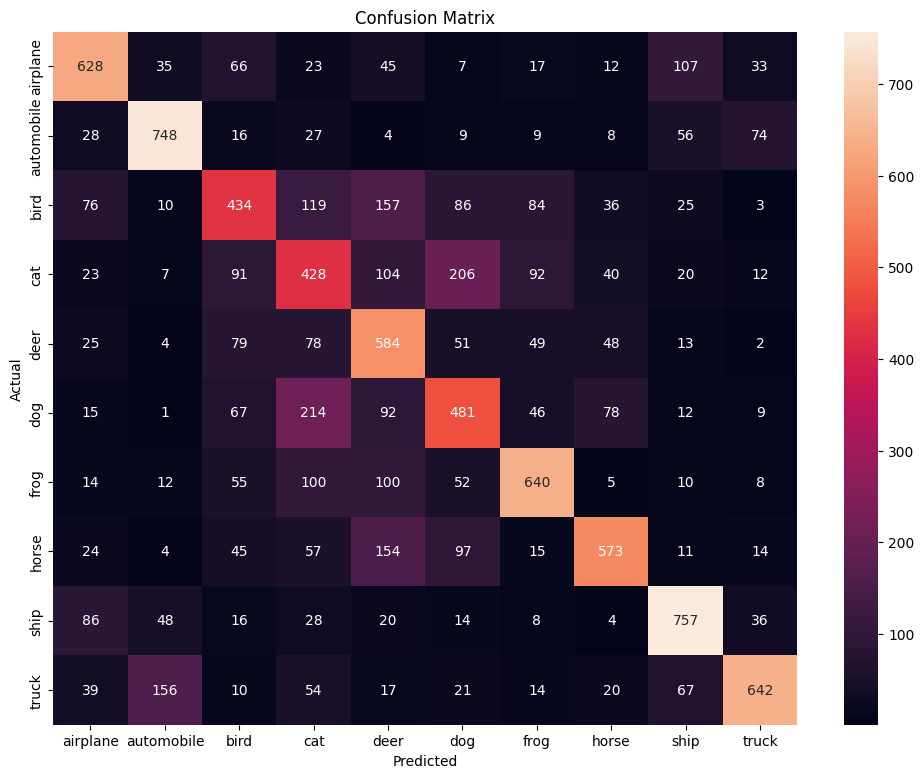

5_layer_32_filter_5_kernel_False_dropout
Accuracy is  0.5915
F1 Score is  0.5938210113528486
Precision is  0.6010919547807718
Recall is  0.5929720307186064
Epoch 1/10
500/500 [==============================] - 17s 28ms/step - loss: 1.7586 - accuracy: 0.3550 - val_loss: 1.4743 - val_accuracy: 0.4574
Epoch 2/10
500/500 [==============================] - 13s 27ms/step - loss: 1.3608 - accuracy: 0.5122 - val_loss: 1.1785 - val_accuracy: 0.5759
Epoch 3/10
500/500 [==============================] - 13s 26ms/step - loss: 1.1620 - accuracy: 0.5861 - val_loss: 1.0712 - val_accuracy: 0.6121
Epoch 4/10
500/500 [==============================] - 13s 27ms/step - loss: 1.0110 - accuracy: 0.6404 - val_loss: 0.9933 - val_accuracy: 0.6444
Epoch 5/10
500/500 [==============================] - 13s 26ms/step - loss: 0.8718 - accuracy: 0.6899 - val_loss: 1.0085 - val_accuracy: 0.6446
Epoch 6/10
500/500 [==============================] - 13s 26ms/step - loss: 0.7417 - accuracy: 0.7336 - val_loss: 1.0130 - v

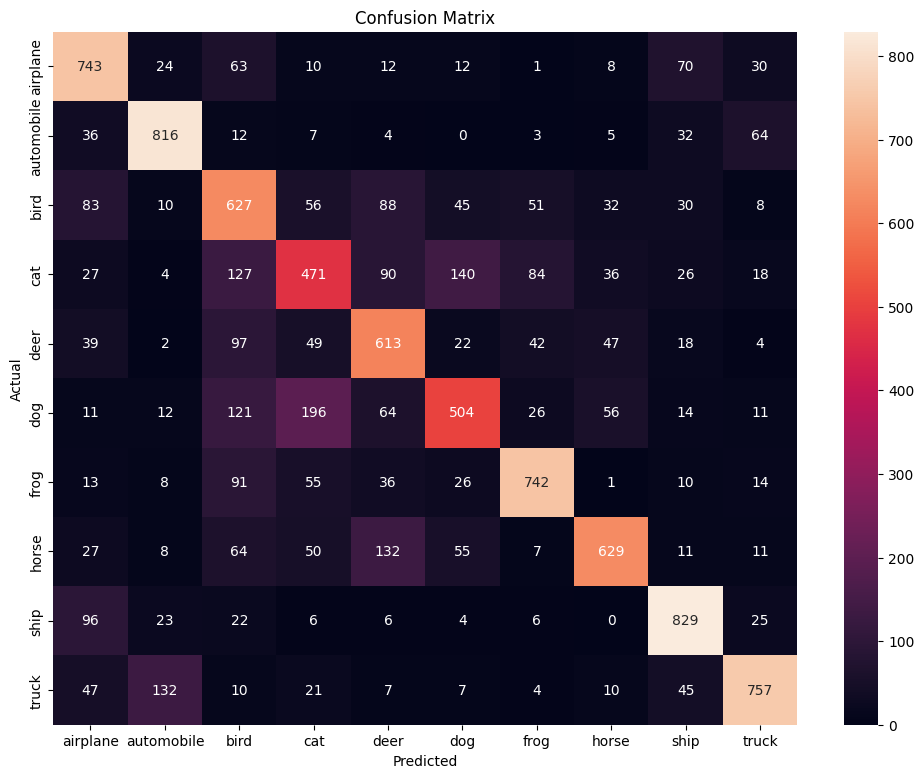

5_layer_64_filter_3_kernel_True_dropout
Accuracy is  0.6731
F1 Score is  0.6725923841571053
Precision is  0.6767319892170389
Recall is  0.6740645654131524
Epoch 1/10
500/500 [==============================] - 14s 24ms/step - loss: 1.6112 - accuracy: 0.4168 - val_loss: 1.3295 - val_accuracy: 0.5171
Epoch 2/10
500/500 [==============================] - 11s 22ms/step - loss: 1.1908 - accuracy: 0.5750 - val_loss: 1.0956 - val_accuracy: 0.6140
Epoch 3/10
500/500 [==============================] - 11s 22ms/step - loss: 0.9718 - accuracy: 0.6559 - val_loss: 1.0379 - val_accuracy: 0.6329
Epoch 4/10
500/500 [==============================] - 12s 23ms/step - loss: 0.7739 - accuracy: 0.7268 - val_loss: 1.0244 - val_accuracy: 0.6486
Epoch 5/10
500/500 [==============================] - 11s 22ms/step - loss: 0.5482 - accuracy: 0.8063 - val_loss: 1.1347 - val_accuracy: 0.6336
Epoch 6/10
500/500 [==============================] - 12s 23ms/step - loss: 0.3395 - accuracy: 0.8810 - val_loss: 1.4125 - va

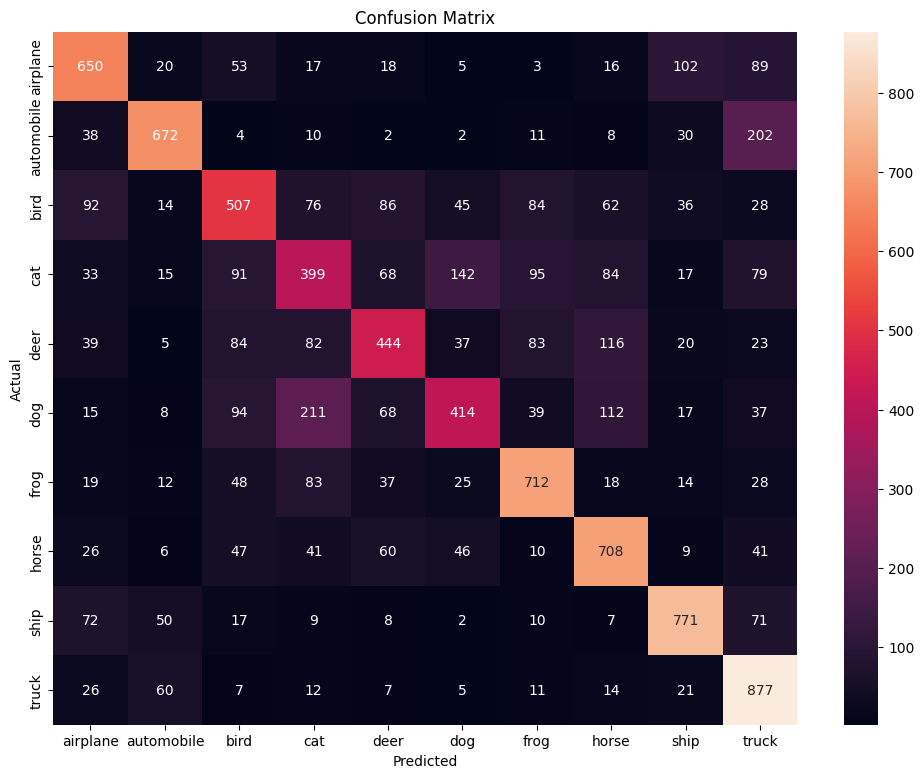

5_layer_64_filter_3_kernel_False_dropout
Accuracy is  0.6154
F1 Score is  0.6096562169072728
Precision is  0.613855850406169
Recall is  0.6148994465619431
Epoch 1/10
500/500 [==============================] - 22s 38ms/step - loss: 1.8716 - accuracy: 0.3070 - val_loss: 1.5435 - val_accuracy: 0.4280
Epoch 2/10
500/500 [==============================] - 19s 37ms/step - loss: 1.5221 - accuracy: 0.4447 - val_loss: 1.3699 - val_accuracy: 0.5015
Epoch 3/10
500/500 [==============================] - 19s 37ms/step - loss: 1.3745 - accuracy: 0.5069 - val_loss: 1.3085 - val_accuracy: 0.5225
Epoch 4/10
500/500 [==============================] - 18s 37ms/step - loss: 1.2578 - accuracy: 0.5475 - val_loss: 1.2133 - val_accuracy: 0.5659
Epoch 5/10
500/500 [==============================] - 19s 37ms/step - loss: 1.1555 - accuracy: 0.5842 - val_loss: 1.2007 - val_accuracy: 0.5736
Epoch 6/10
500/500 [==============================] - 18s 37ms/step - loss: 1.0539 - accuracy: 0.6272 - val_loss: 1.1545 - va

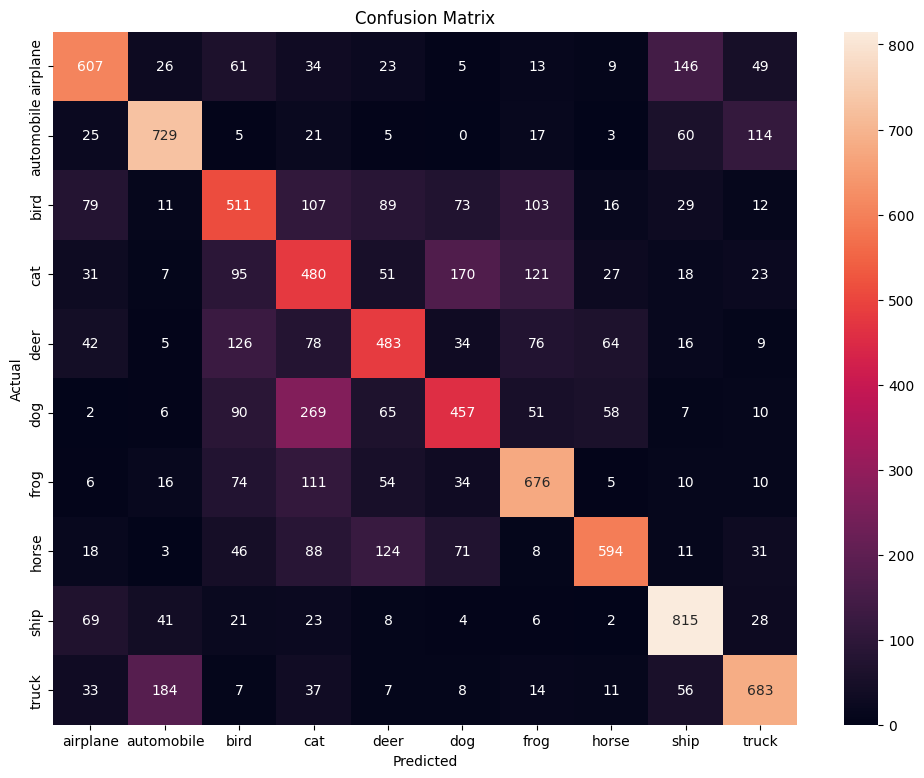

5_layer_64_filter_5_kernel_True_dropout
Accuracy is  0.6035
F1 Score is  0.6042741092887548
Precision is  0.6096321931636093
Recall is  0.6036144815664344
Epoch 1/10
500/500 [==============================] - 20s 33ms/step - loss: 2.3015 - accuracy: 0.1078 - val_loss: 2.2998 - val_accuracy: 0.1081
Epoch 2/10
500/500 [==============================] - 17s 33ms/step - loss: 1.8491 - accuracy: 0.3229 - val_loss: 1.5522 - val_accuracy: 0.4334
Epoch 3/10
500/500 [==============================] - 16s 32ms/step - loss: 1.4203 - accuracy: 0.4897 - val_loss: 1.3942 - val_accuracy: 0.5029
Epoch 4/10
500/500 [==============================] - 16s 32ms/step - loss: 1.2108 - accuracy: 0.5659 - val_loss: 1.3029 - val_accuracy: 0.5431
Epoch 5/10
500/500 [==============================] - 16s 32ms/step - loss: 1.0165 - accuracy: 0.6412 - val_loss: 1.3024 - val_accuracy: 0.5535
Epoch 6/10
500/500 [==============================] - 16s 32ms/step - loss: 0.7906 - accuracy: 0.7230 - val_loss: 1.3961 - va

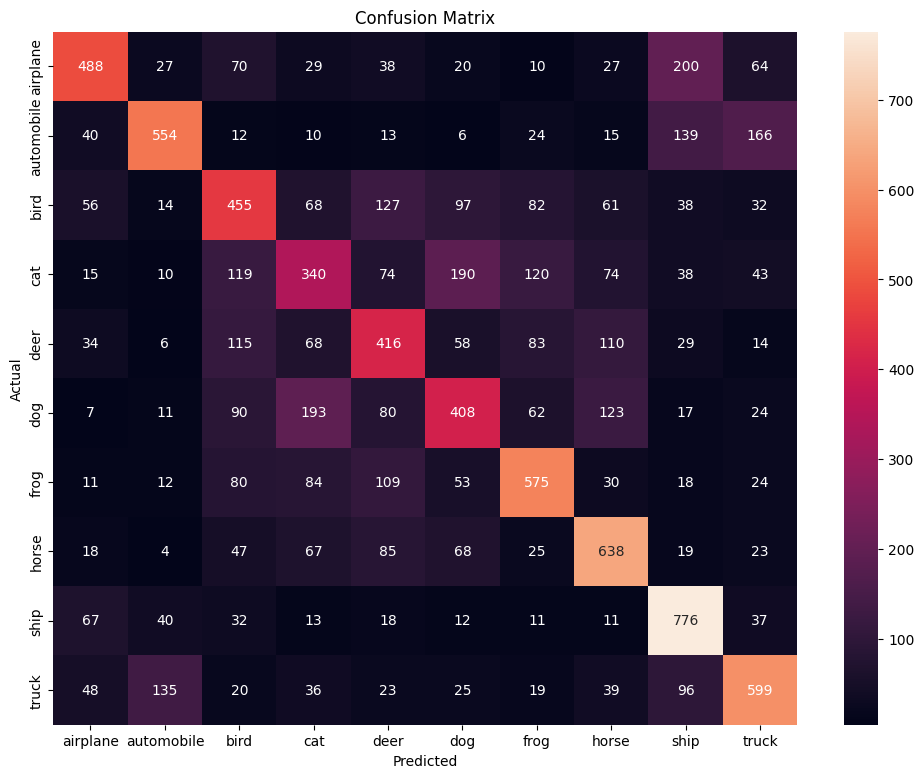

5_layer_64_filter_5_kernel_False_dropout
Accuracy is  0.5249
F1 Score is  0.522219636532335
Precision is  0.525904234205726
Recall is  0.5247522934432904


In [ ]:
for num_layer in num_layers:
  for num_filter in num_filters:
    for kernel in kernel_size:
      for is_dropout in dropout:
        model = build_model(num_layer, num_filter, kernel, is_dropout)
        model_name = str(num_layer)+"_layer_"+str(num_filter)+"_filter_"+str(kernel)+"_kernel_"+str(is_dropout)+"_dropout"
        models[model_name] = model
        
        folder_name = "weights/" + model_name + "/"

        if not os.path.exists(folder_name):
          os.makedirs(folder_name)

        checkpoint_name = folder_name+"Weights-{epoch:03d}--{accuracy:.5f}.hdf5"
        checkpoint = ModelCheckpoint(checkpoint_name, monitor="val_loss", save_best_only=False, verbose=0)
        
        histories[model_name] = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=64, callbacks=[checkpoint])
        y_predicted = model.predict(X_validation)
        results[model_name] = print_result(y_validation, y_predicted, model_name)
        

In [ ]:
dict(sorted(results.items(), key=lambda item: item[1][0], reverse=True))

{'5_layer_64_filter_3_kernel_True_dropout': (0.6731,
  0.6725923841571053,
  0.6767319892170389,
  0.6740645654131524),
 '5_layer_32_filter_3_kernel_True_dropout': (0.6529,
  0.6527127961749006,
  0.6575343406946424,
  0.6540512707374979),
 '3_layer_64_filter_3_kernel_True_dropout': (0.6513,
  0.6489212457465012,
  0.6491252585267974,
  0.6524107381821058),
 '3_layer_32_filter_3_kernel_True_dropout': (0.6379,
  0.6417925008010823,
  0.65070636759572,
  0.6377416189213132),
 '3_layer_32_filter_5_kernel_True_dropout': (0.6235,
  0.6227154809075971,
  0.6246473247576192,
  0.6234601321194547),
 '3_layer_32_filter_5_kernel_False_dropout': (0.6194,
  0.6229410566961209,
  0.6301363125578716,
  0.6189853889205528),
 '3_layer_32_filter_3_kernel_False_dropout': (0.6154,
  0.6131730964669974,
  0.6137764303617244,
  0.6158437697309358),
 '5_layer_64_filter_3_kernel_False_dropout': (0.6154,
  0.6096562169072728,
  0.613855850406169,
  0.6148994465619431),
 '3_layer_64_filter_5_kernel_True_dropou

Epoch 1/10
625/625 [==============================] - 27s 25ms/step - loss: 1.6296 - accuracy: 0.4071 - val_loss: 1.2479 - val_accuracy: 0.5544
Epoch 2/10
625/625 [==============================] - 15s 24ms/step - loss: 1.2310 - accuracy: 0.5595 - val_loss: 1.0383 - val_accuracy: 0.6414
Epoch 3/10
625/625 [==============================] - 15s 25ms/step - loss: 0.9980 - accuracy: 0.6455 - val_loss: 0.9202 - val_accuracy: 0.6752
Epoch 4/10
625/625 [==============================] - 16s 25ms/step - loss: 0.8342 - accuracy: 0.7053 - val_loss: 0.9062 - val_accuracy: 0.6831
Epoch 5/10
625/625 [==============================] - 15s 25ms/step - loss: 0.6751 - accuracy: 0.7581 - val_loss: 0.9106 - val_accuracy: 0.6897
Epoch 6/10
625/625 [==============================] - 15s 24ms/step - loss: 0.5555 - accuracy: 0.8000 - val_loss: 0.9877 - val_accuracy: 0.6930
Epoch 7/10
625/625 [==============================] - 15s 24ms/step - loss: 0.4503 - accuracy: 0.8356 - val_loss: 0.9887 - val_accuracy:

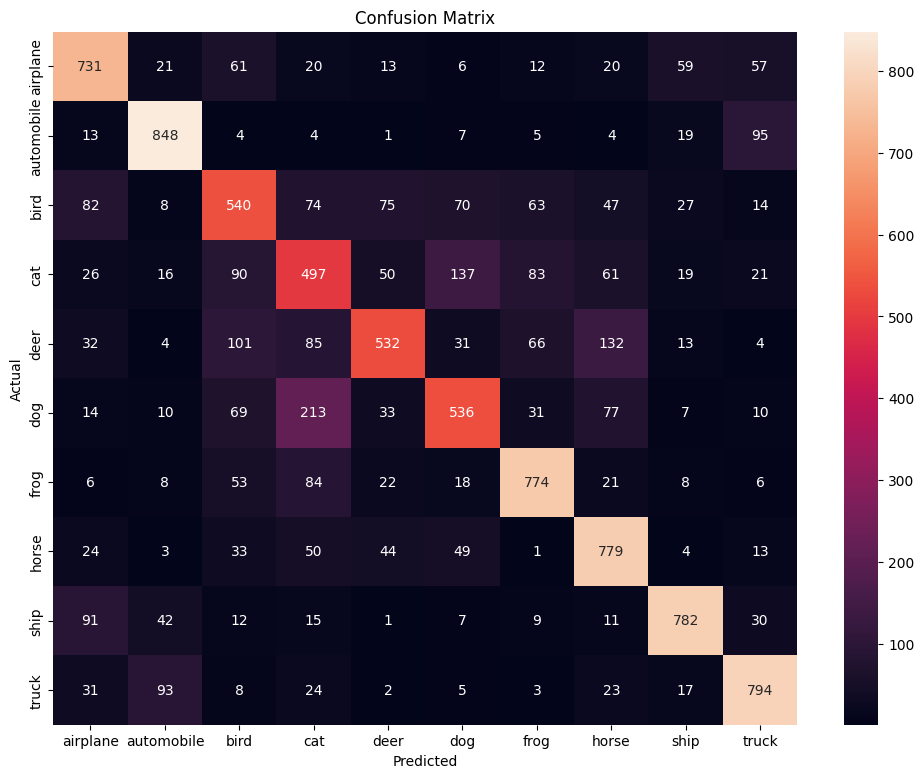

5_layer_64_filter_3_kernel_True_dropout
Accuracy is  0.6813
F1 Score is  0.6792409197094127
Precision is  0.6812648843724773
Recall is  0.6813


(0.6813, 0.6792409197094127, 0.6812648843724773, 0.6813)

In [ ]:
model_name = "5_layer_64_filter_3_kernel_True_dropout"
model = build_model(5, 64, 3, True)

X_train_with_validation = np.concatenate([X_train, X_validation], axis=0)
y_train_with_validation = np.concatenate([y_train, y_validation], axis=0)

history = model.fit(X_train_with_validation, y_train_with_validation, epochs=10, validation_split=0.2, batch_size=64)
y_predicted = model.predict(X_test)
print_result(y_test, y_predicted, model_name)

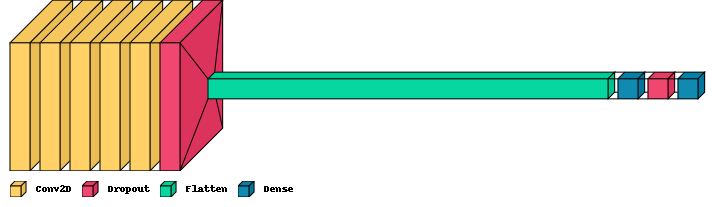

In [ ]:
visualkeras.layered_view(model, legend=True).show()

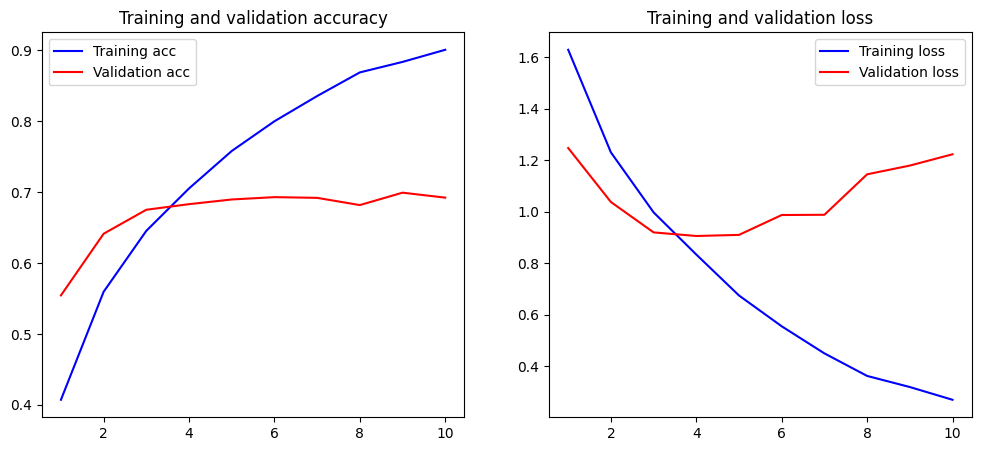

In [ ]:
plot_history(history)

1/1 [==============================] - 0s 32ms/step


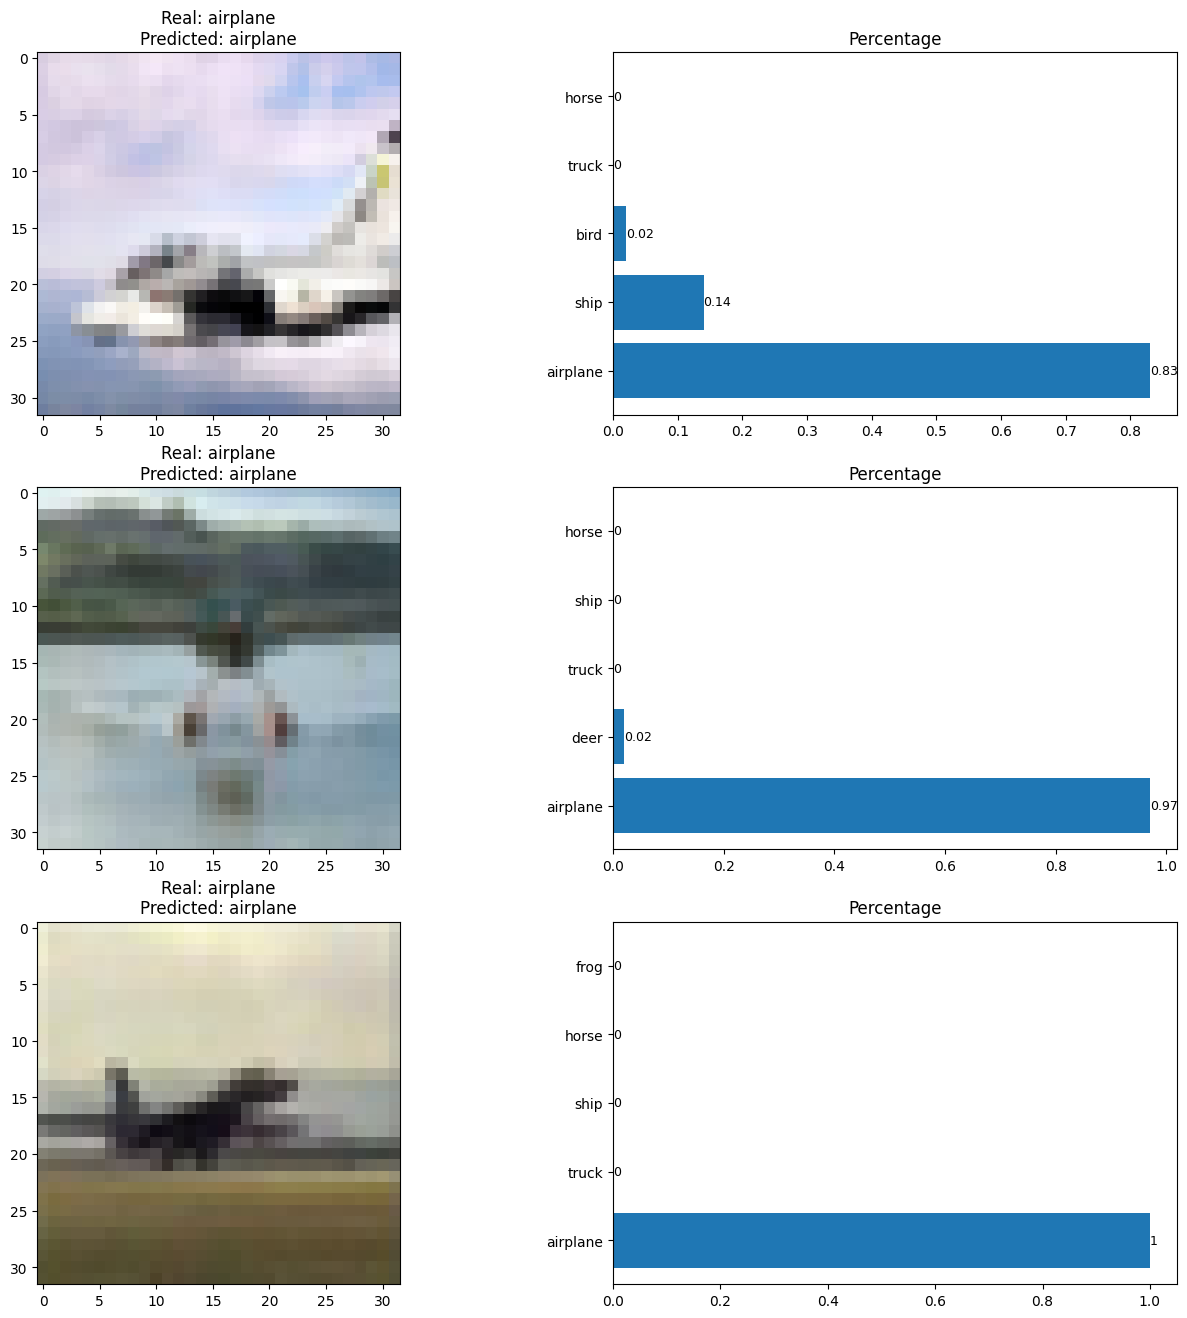

1/1 [==============================] - 0s 18ms/step


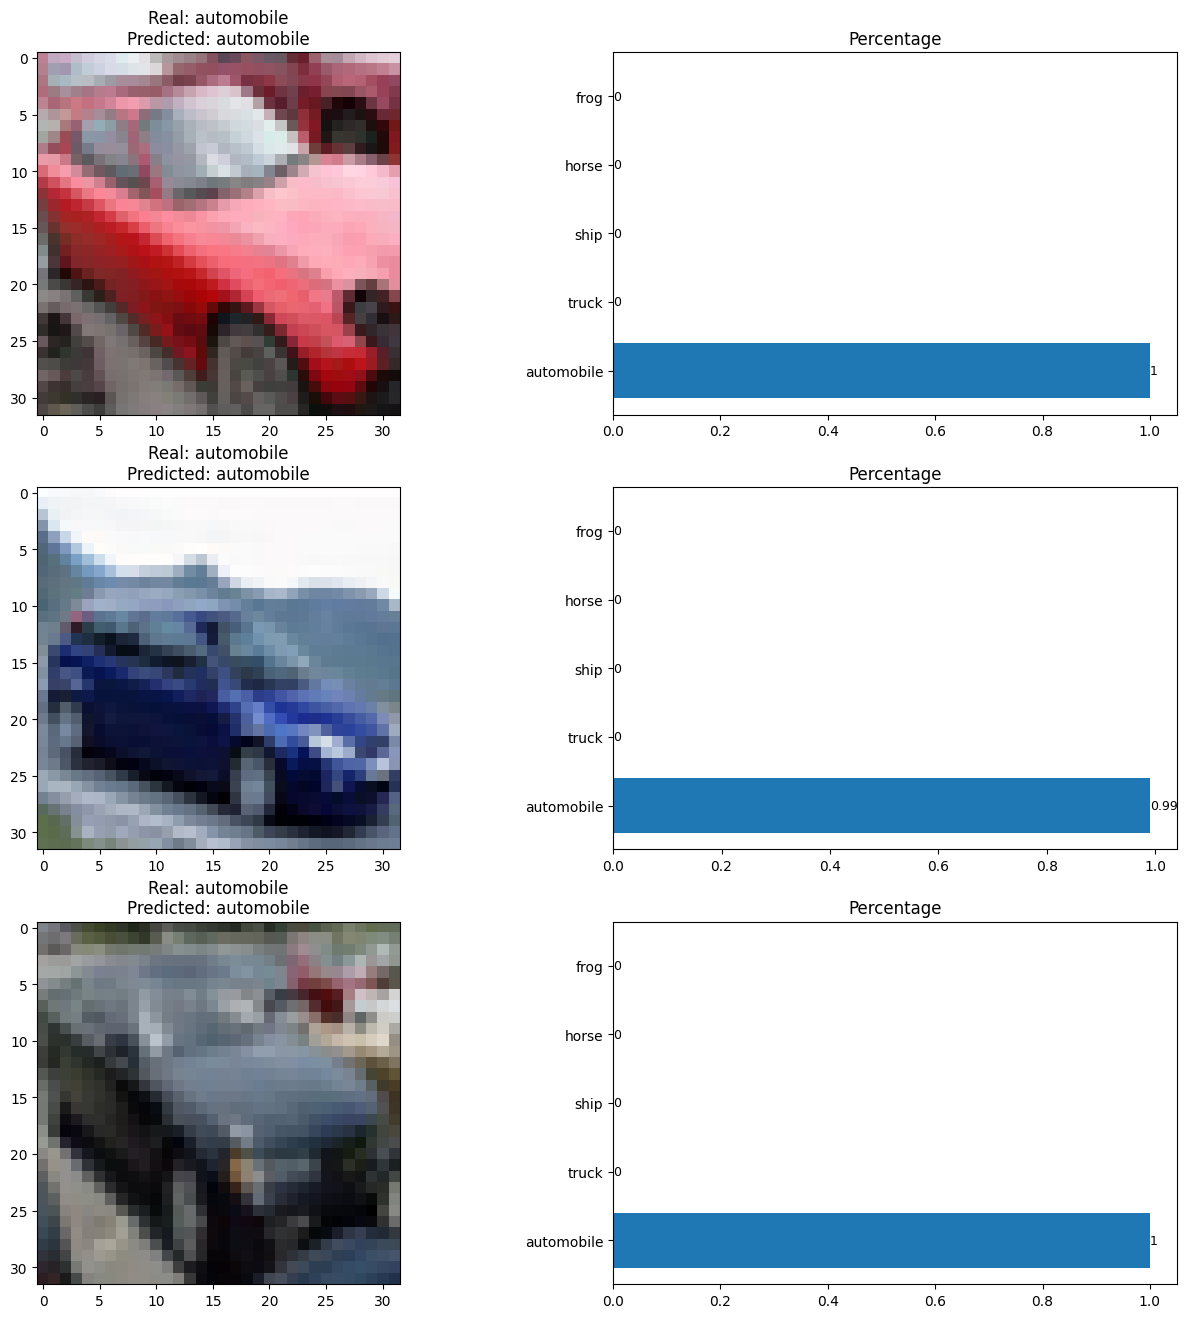

1/1 [==============================] - 0s 21ms/step


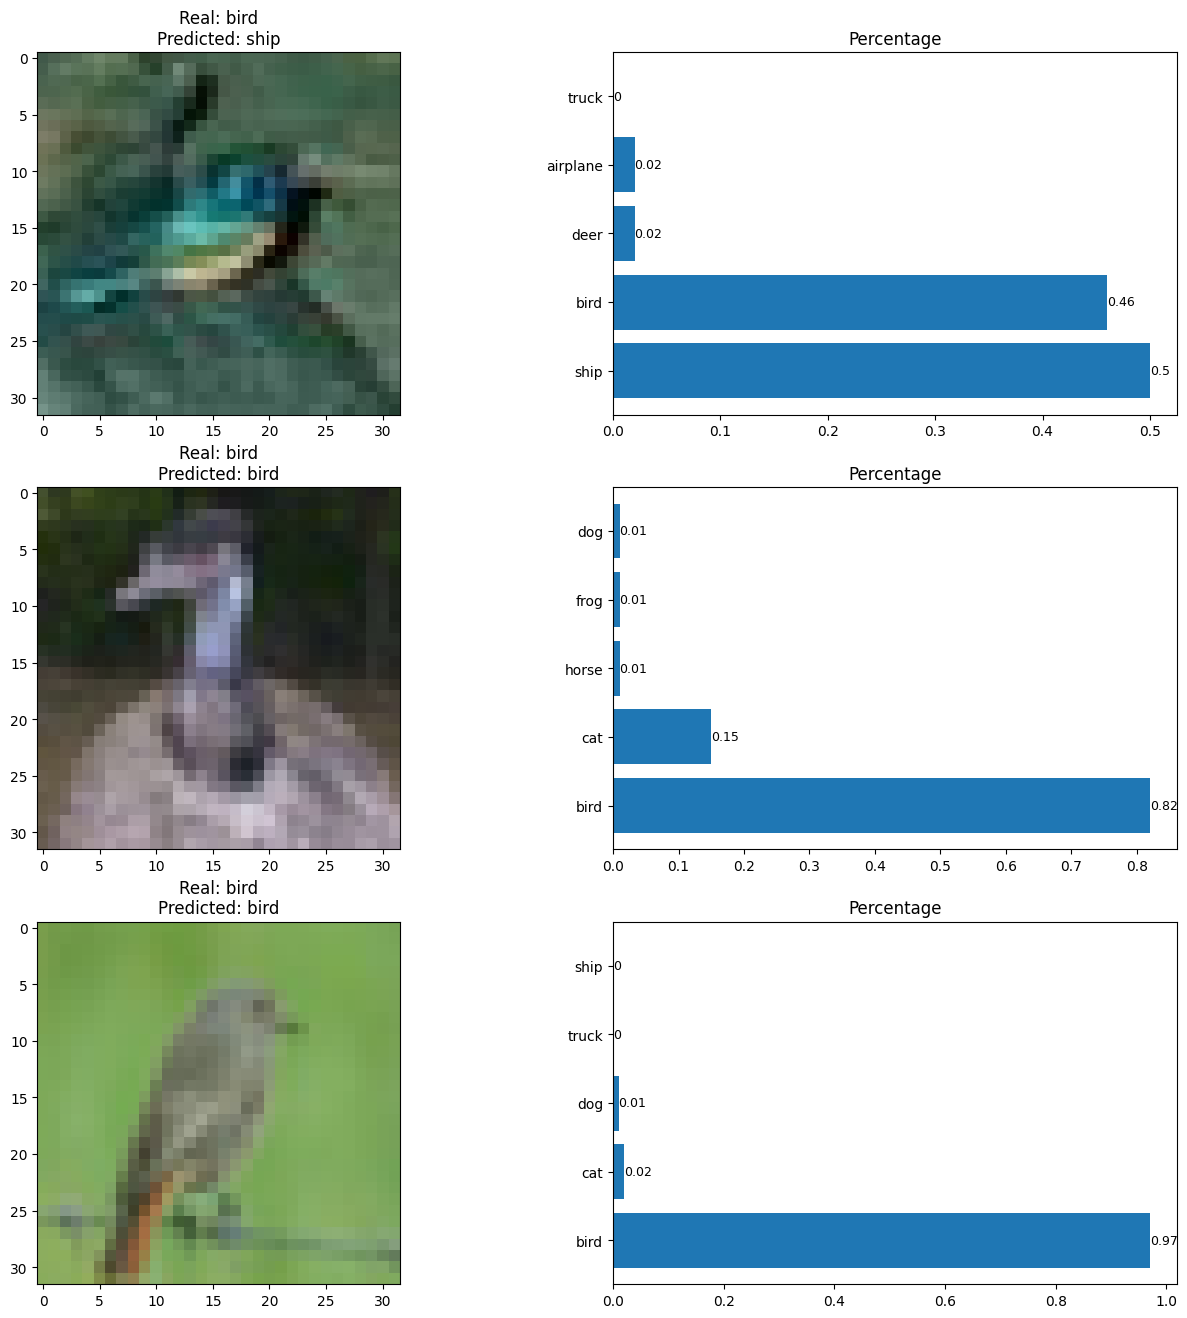

1/1 [==============================] - 0s 22ms/step


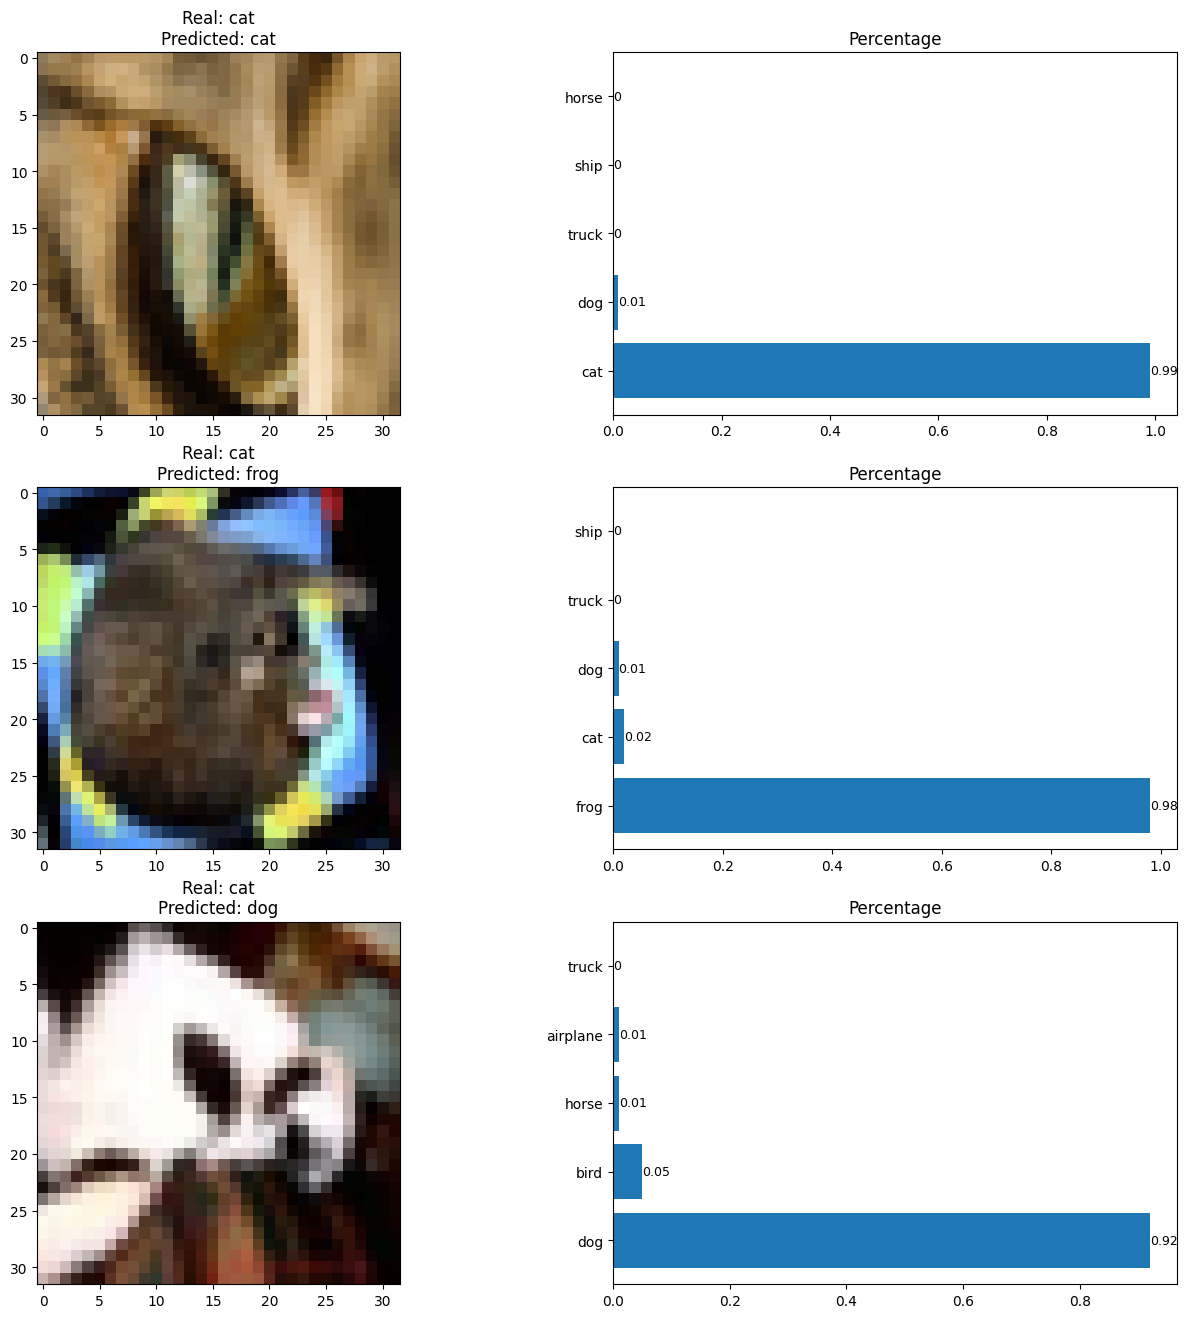

1/1 [==============================] - 0s 21ms/step


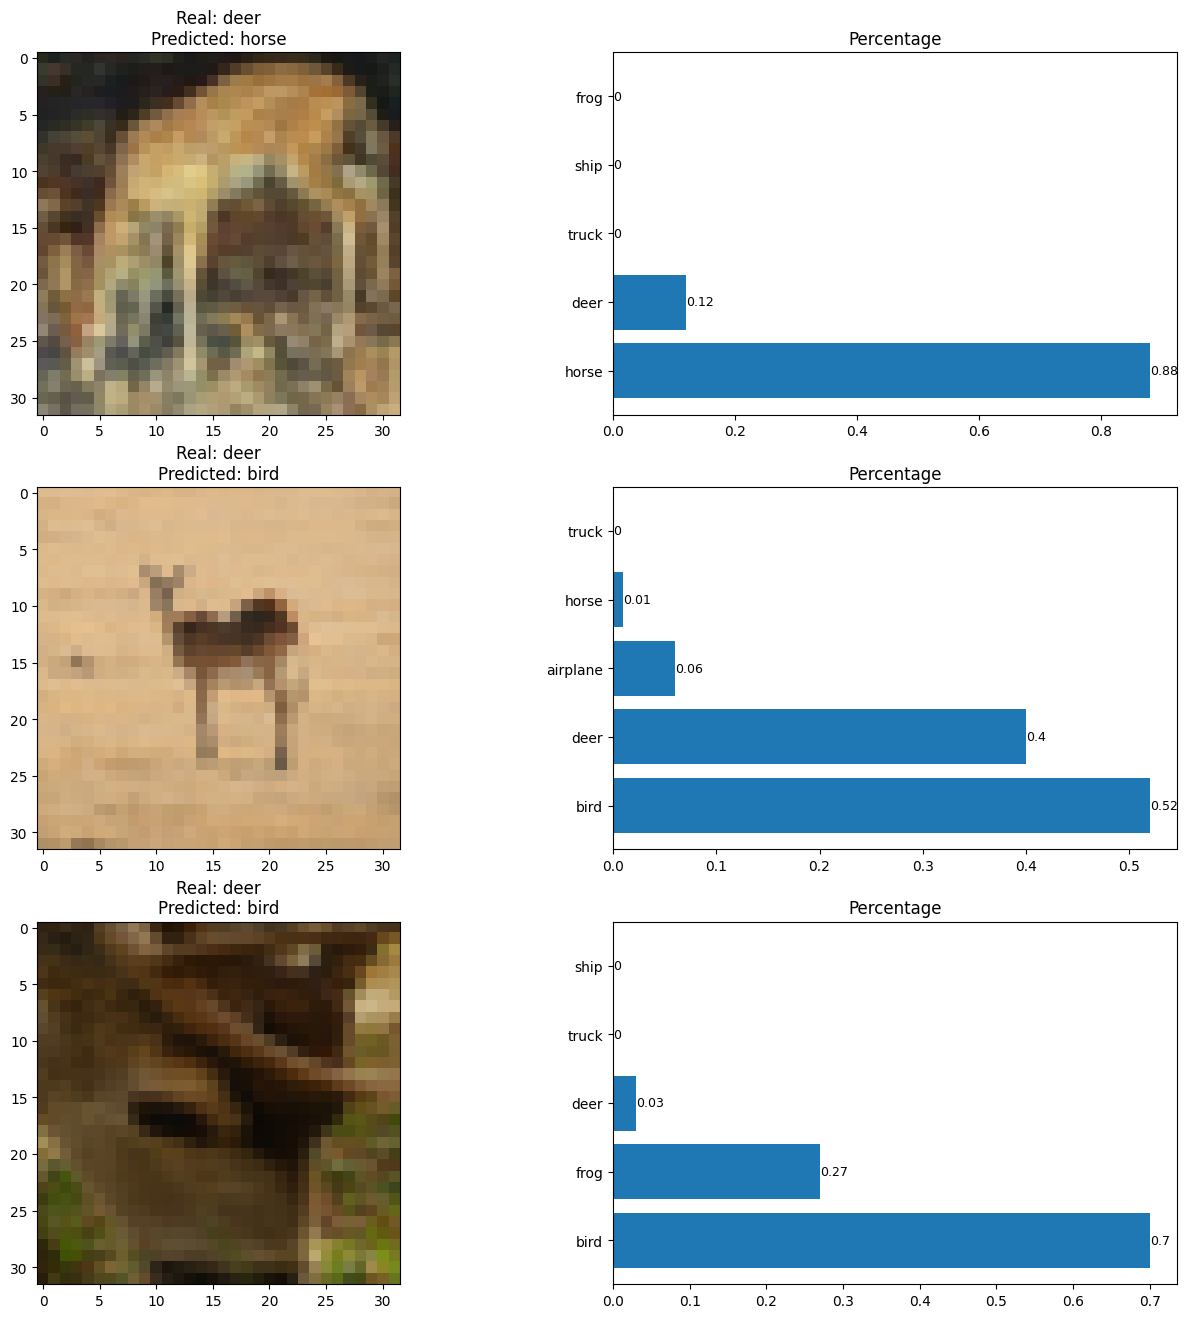

1/1 [==============================] - 0s 21ms/step


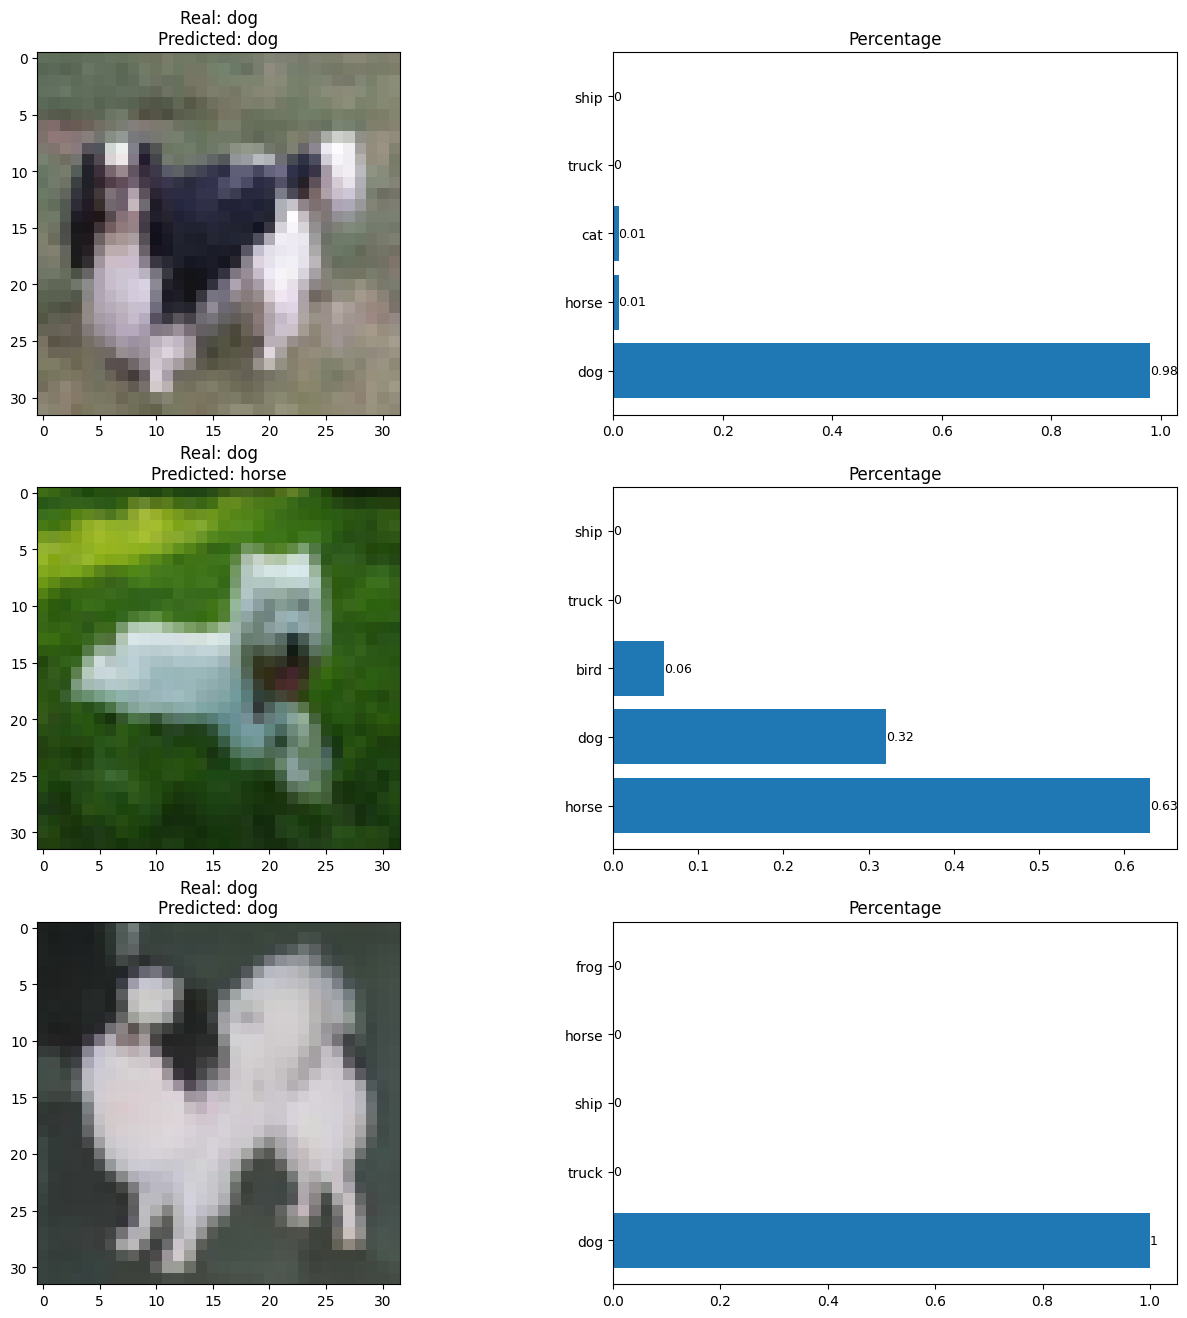

1/1 [==============================] - 0s 23ms/step


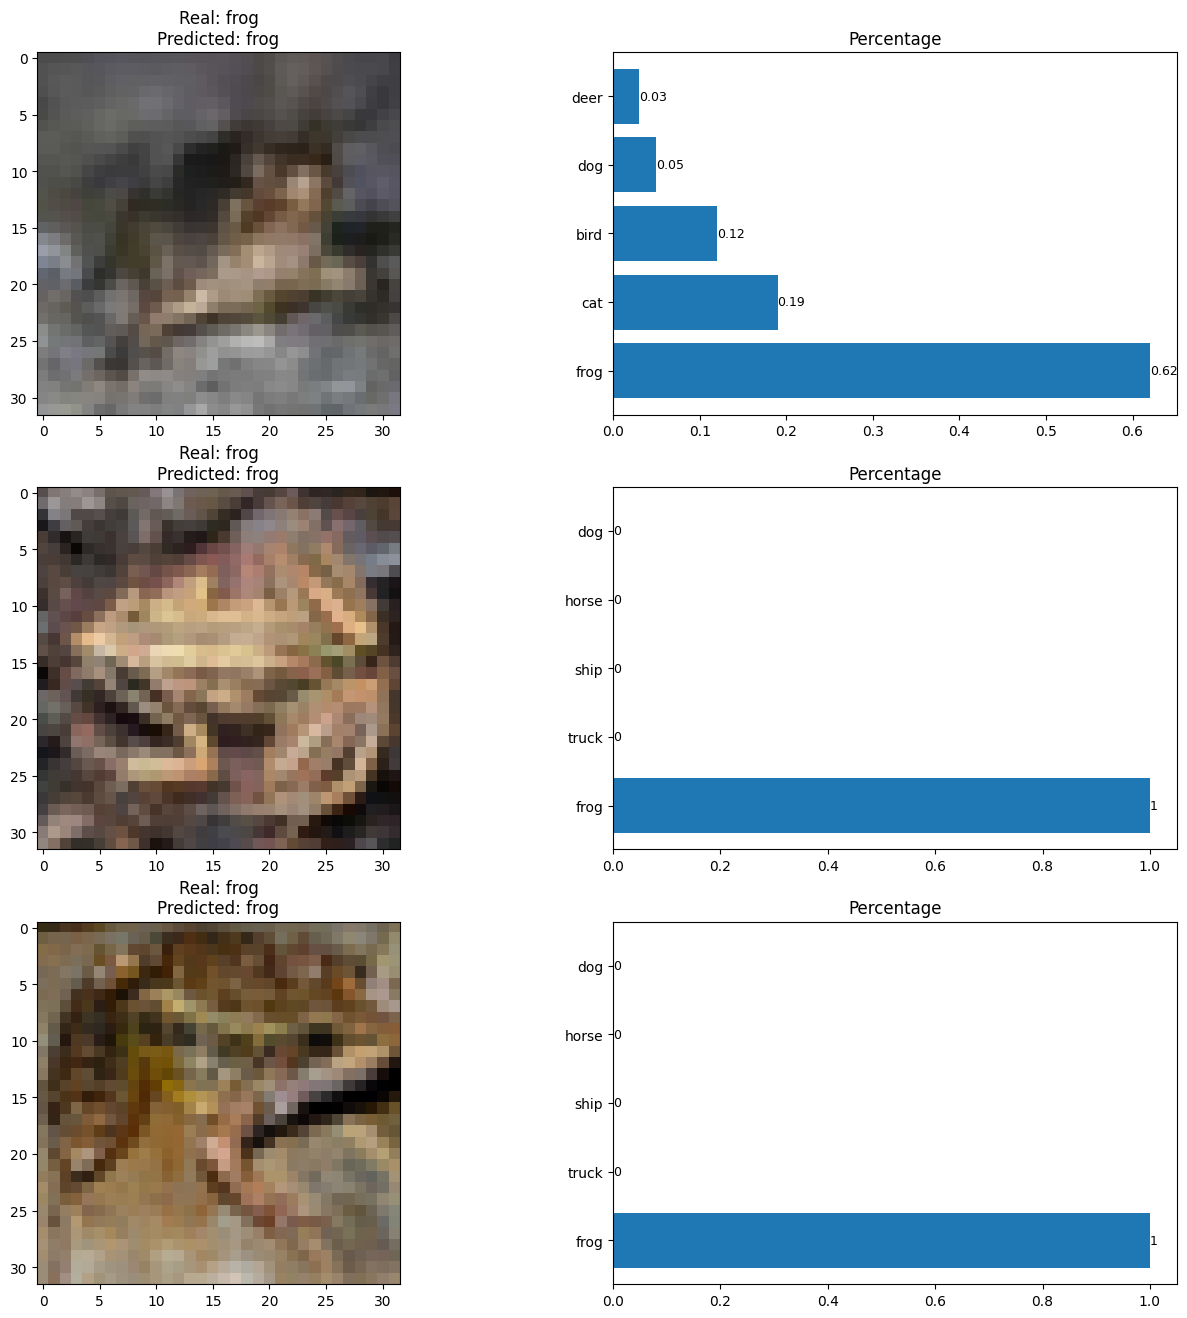

1/1 [==============================] - 0s 19ms/step


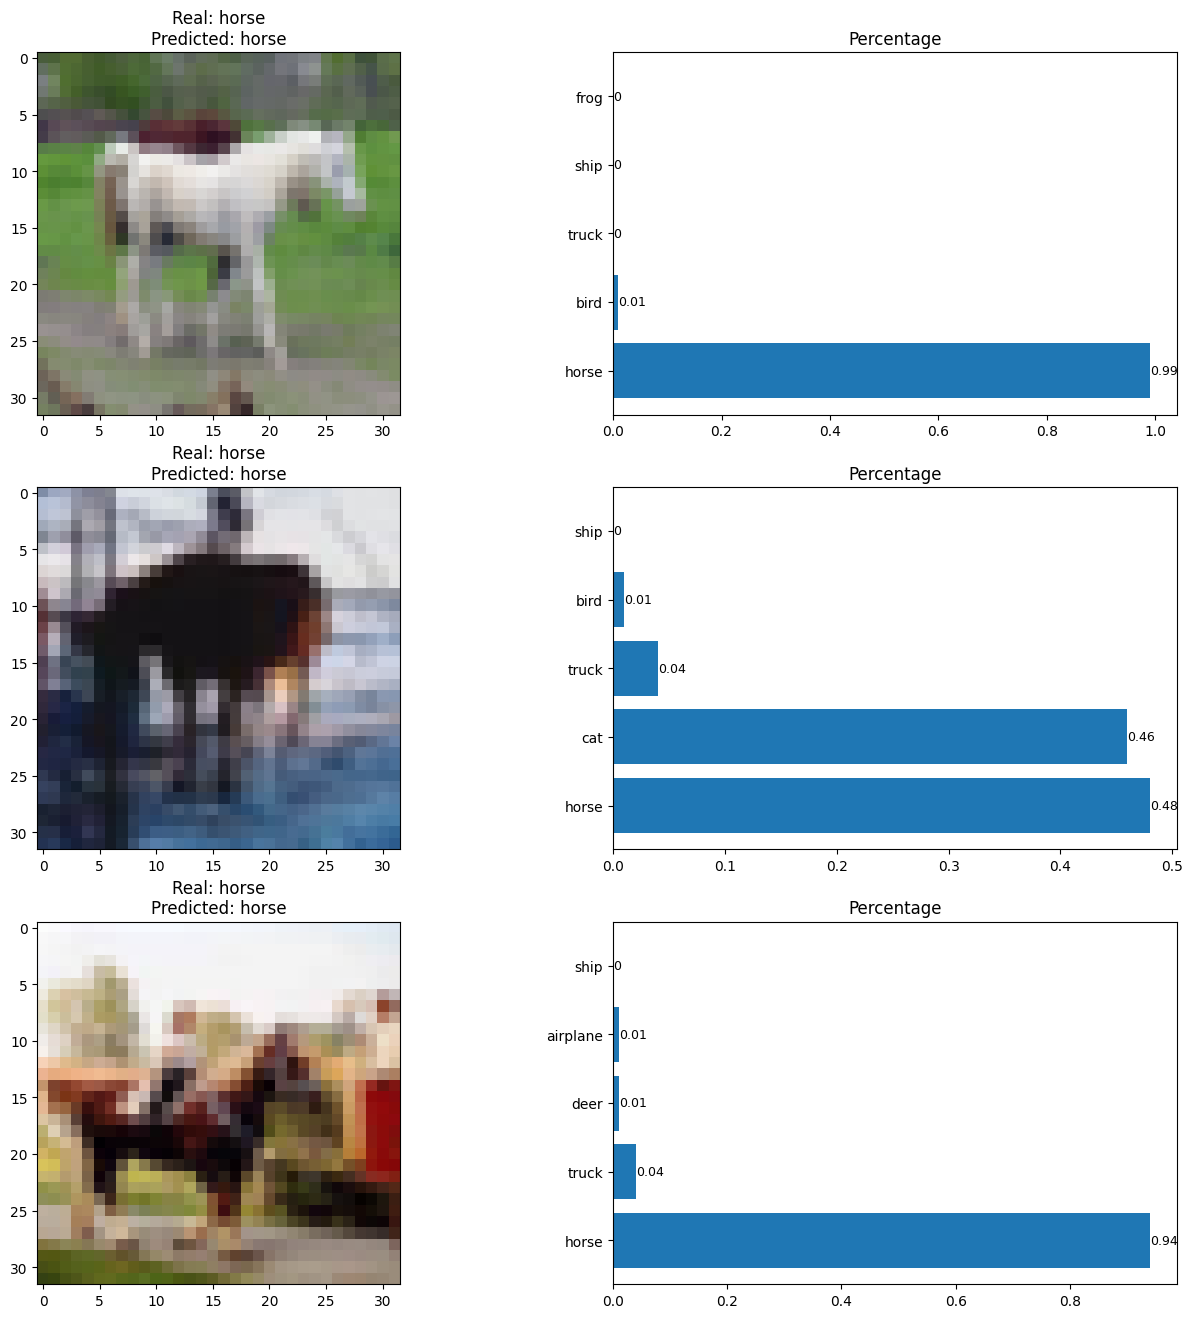

1/1 [==============================] - 0s 25ms/step


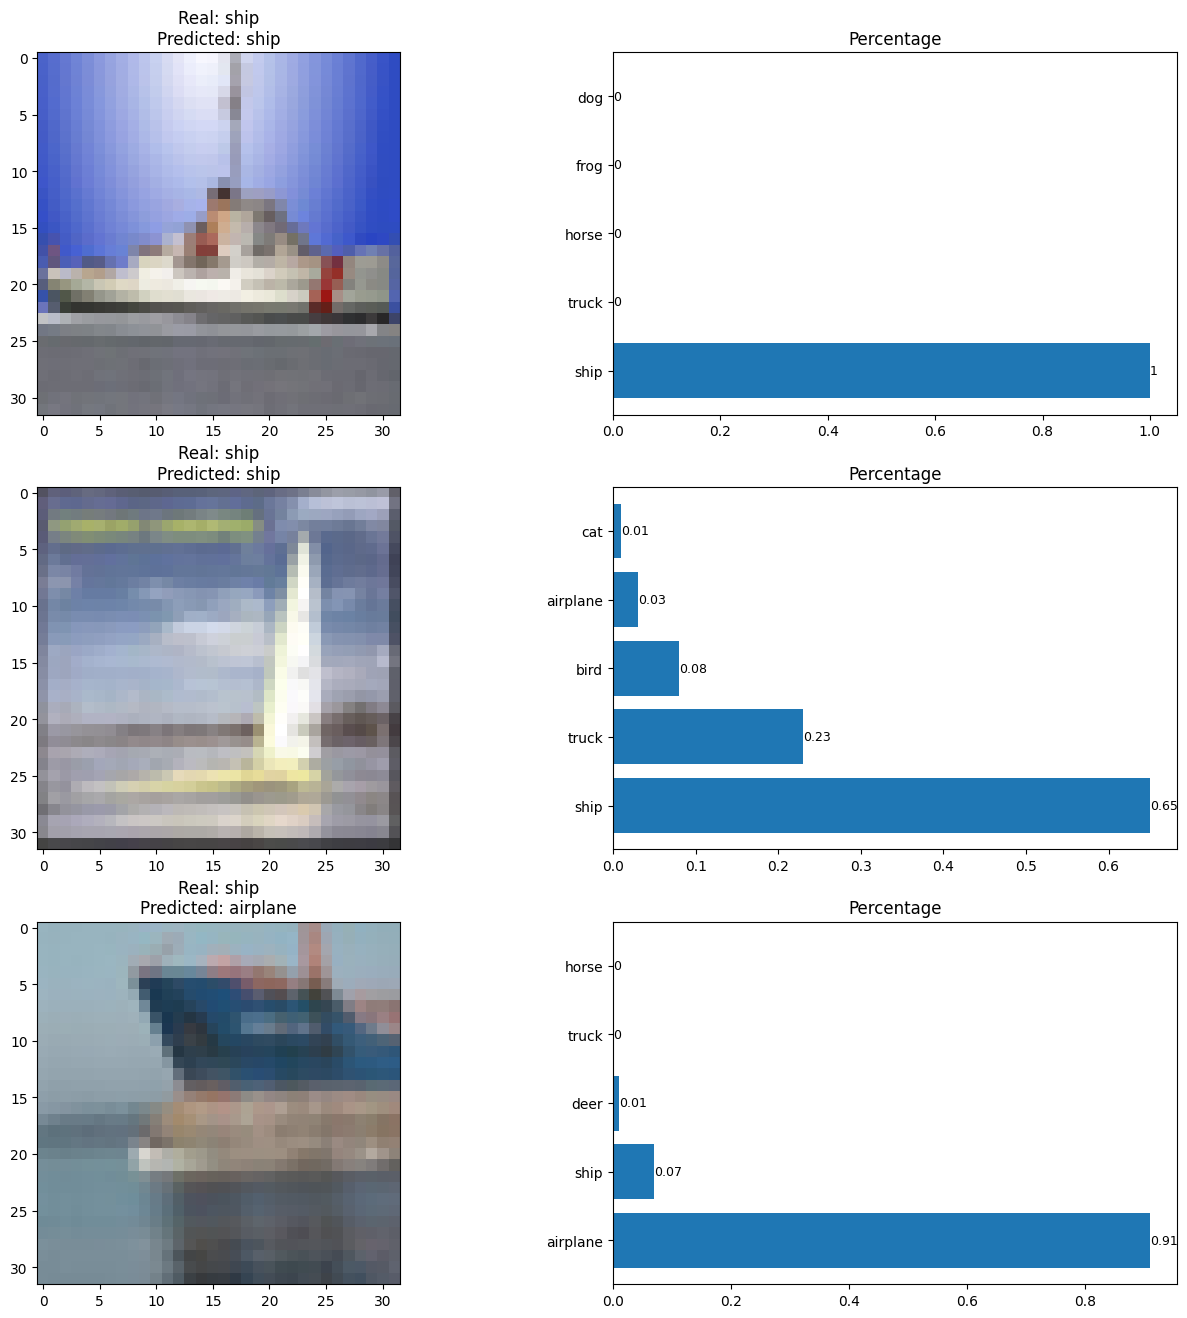

1/1 [==============================] - 0s 20ms/step


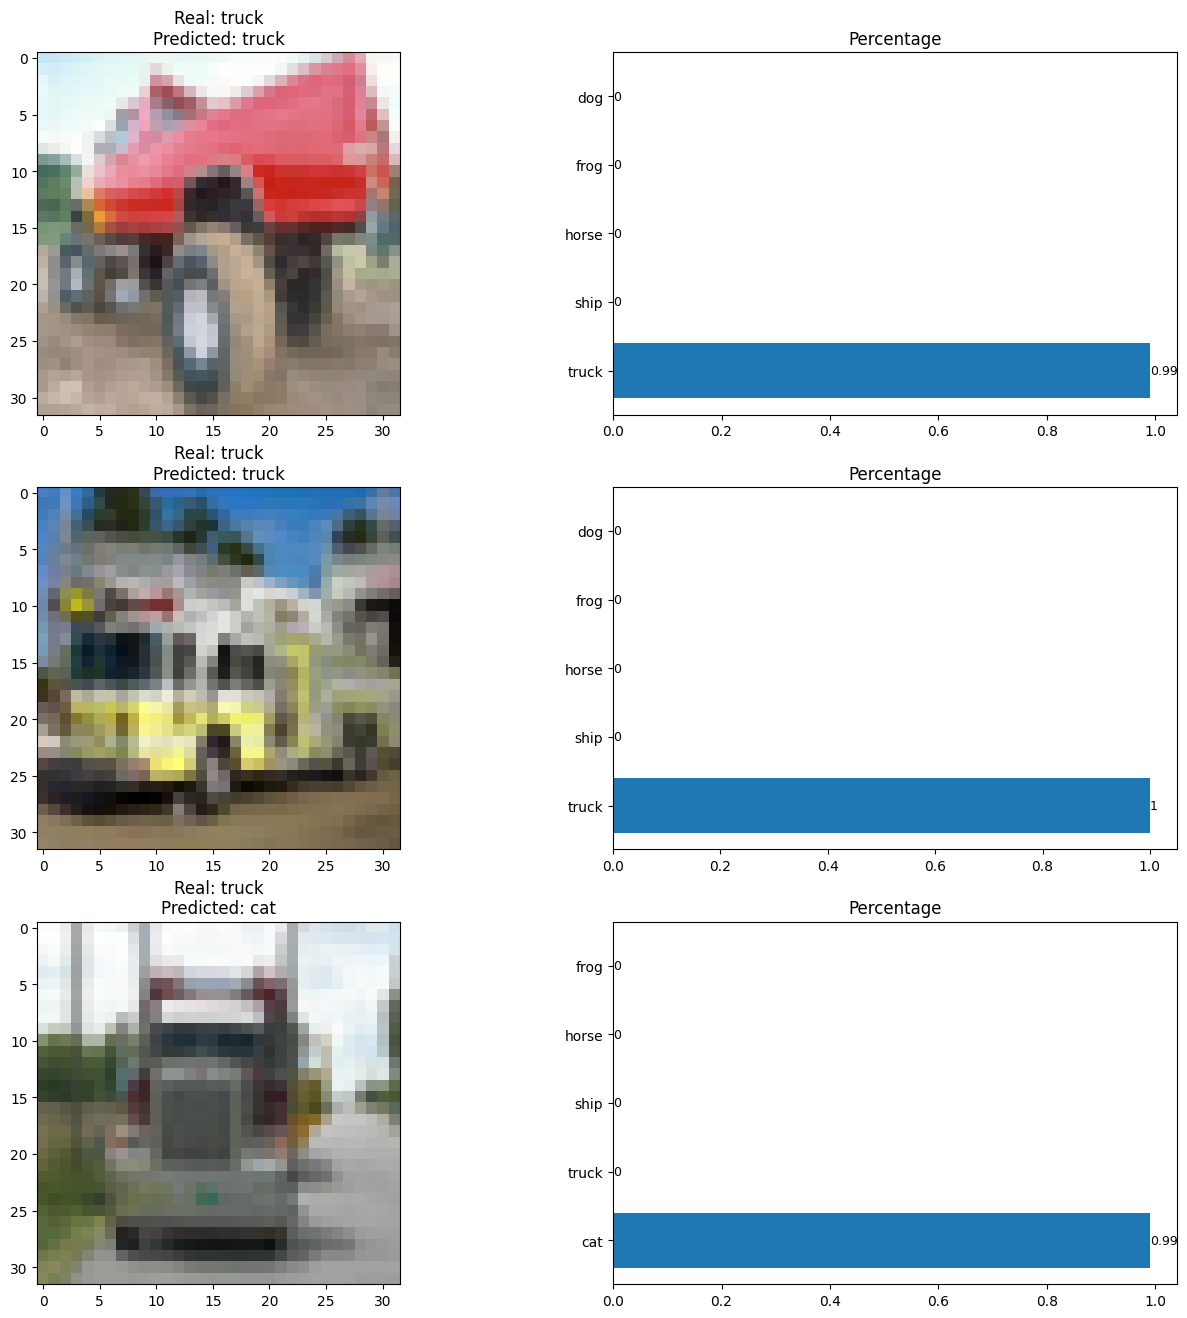

In [ ]:
for i in range(10):
    arr = [0] * 10
    arr[i] = 1
    random_samples = np.random.choice(np.where((y_test == tuple(arr)).all(axis=1))[0], 3, replace=False)
    k = 1
    plt.figure(figsize=(16, 16))
    for j in range(3):
        plt.subplot(3, 2, k)
        y_prediction_sample = model.predict(np.expand_dims(X_test[random_samples[j]], axis=0))
        y_prediction_sample_index = np.argmax(y_prediction_sample, axis=1)
        plt.imshow(X_test[random_samples[j]])
        plt.title("Real: " + labels[i] + "\nPredicted: " +
                labels[y_prediction_sample_index[0]])
        k += 1
        y_prediction_sample = np.round(y_prediction_sample, 2)
        maxN = y_prediction_sample[0].argsort()[-5:][::-1]
        plt.subplot(3, 2, k)
        bars = plt.barh(np.asarray(labels)[maxN], y_prediction_sample[0][maxN])
        plt.bar_label(bars, fontsize=9)
        plt.title('Percentage')
        
        k += 1
    plt.show()

In [ ]:
model_max_pooling = Sequential()
model_max_pooling.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_max_pooling.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model_max_pooling.add(MaxPooling2D(pool_size=(2, 2)))
model_max_pooling.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model_max_pooling.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model_max_pooling.add(MaxPooling2D(pool_size=(2, 2)))
model_max_pooling.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model_max_pooling.add(Dropout(0.3))
model_max_pooling.add(Flatten())
model_max_pooling.add(Dense(128, activation='relu'))
model_max_pooling.add(Dropout(0.3))
model_max_pooling.add(Dense(10, activation='softmax'))

model_max_pooling.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

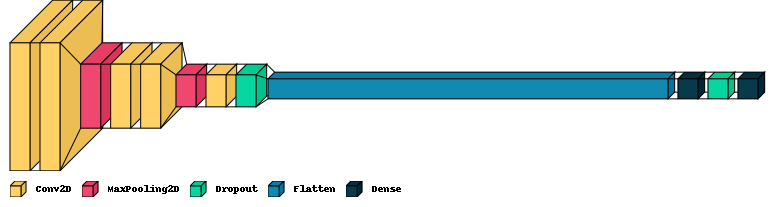

In [ ]:
visualkeras.layered_view(model_max_pooling, legend=True).show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

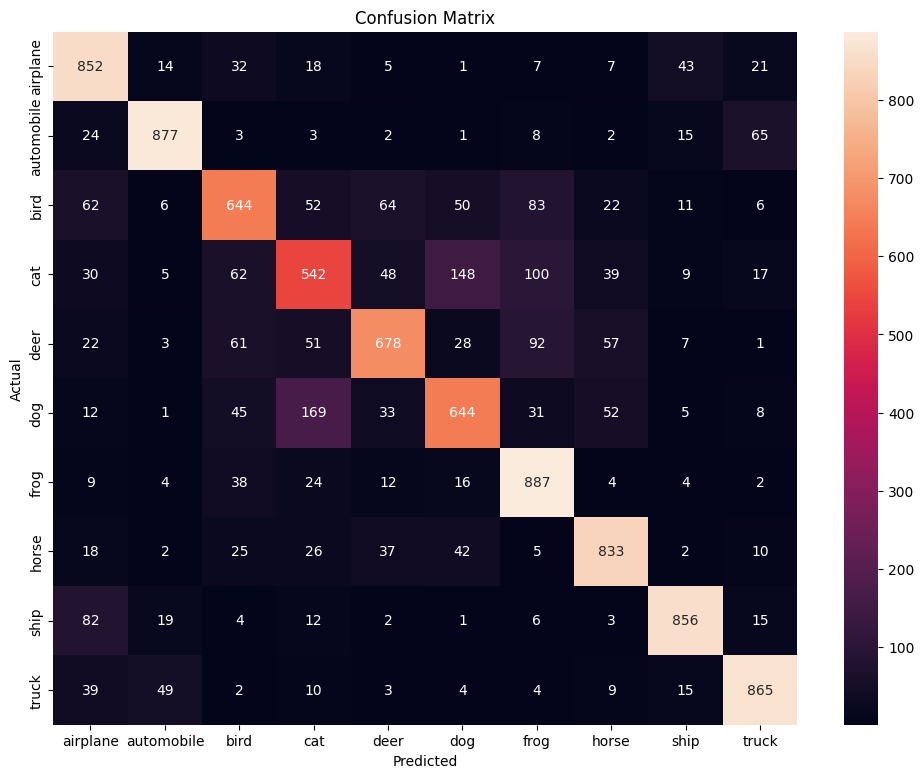

model_max_pooling
Accuracy is  0.7678
F1 Score is  0.7655038115757039
Precision is  0.7669361756854688
Recall is  0.7678


(0.7678, 0.7655038115757039, 0.7669361756854688, 0.7678)

In [ ]:
model_max_pooling.summary()
history_max_pooling = model_max_pooling.fit(X_train_with_validation, y_train_with_validation, epochs=10, validation_split=0.2, batch_size=64)
y_predicted_max_pooling = model_max_pooling.predict(X_test)
print_result(y_test, y_predicted_max_pooling, "model_max_pooling")

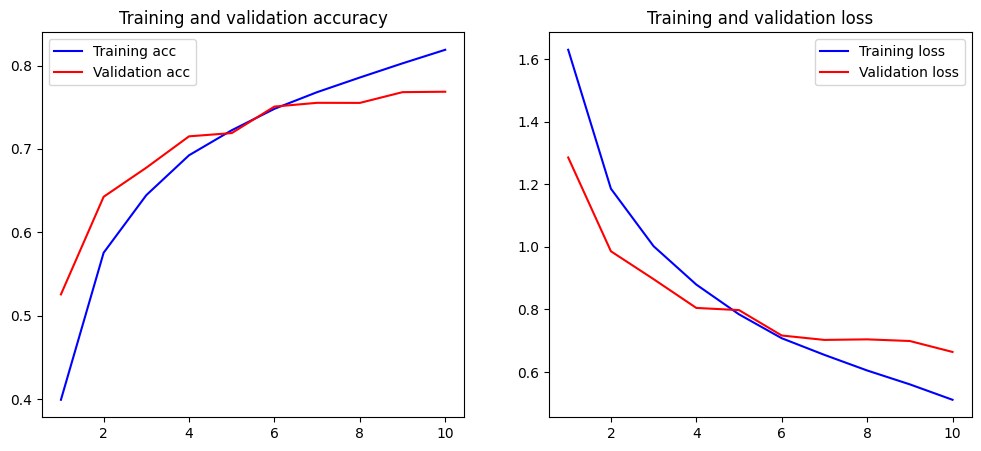

In [ ]:
plot_history(history_max_pooling)